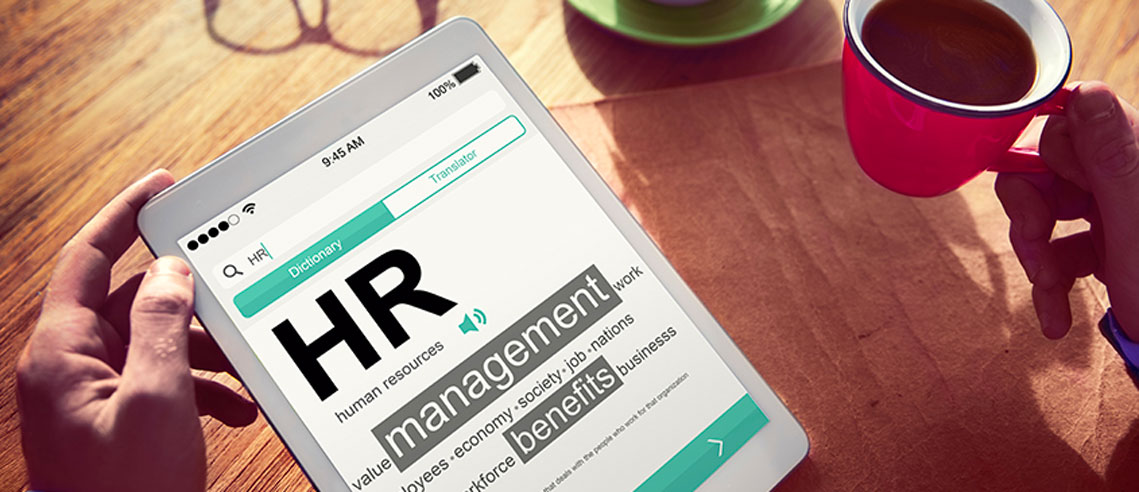

# HR_EMPLOYEE_PROJECT

In [1]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB

In [2]:
hr=pd.read_csv('HR-Employee.csv')
hr

Age Attrition     BusinessTravel  DailyRate              Department  \
0      41       Yes      Travel_Rarely       1102                   Sales   
1      49        No  Travel_Frequently        279  Research & Development   
2      37       Yes      Travel_Rarely       1373  Research & Development   
3      33        No  Travel_Frequently       1392  Research & Development   
4      27        No      Travel_Rarely        591  Research & Development   
...   ...       ...                ...        ...                     ...   
1465   36        No  Travel_Frequently        884  Research & Development   
1466   39        No      Travel_Rarely        613  Research & Development   
1467   27        No      Travel_Rarely        155  Research & Development   
1468   49        No  Travel_Frequently       1023                   Sales   
1469   34        No      Travel_Rarely        628  Research & Development   

      DistanceFromHome  Education EducationField  EmployeeCount  \
0                    1          2  Life Sciences              1   
1                    8          1  Life Sciences              1   
2                    2          2          Other              1   
3                    3          4  Life Sciences              1   
4                    2          1        Medical              1   
...                ...        ...            ...            ...   
1465                23          2        Medical              1   
1466                 6          1        Medical              1   
1467                 4          3  Life Sciences              1   
1468                 2          3        Medical              1   
1469                 8          3        Medical              1   

      EmployeeNumber  ...  RelationshipSatisfaction StandardHours  \
0                  1  ...                         1            80   
1                  2  ...                         4            80   
2                  4  ...                         2            80   
3                  5  ...                         3            80   
4                  7  ...                         4            80   
...              ...  ...                       ...           ...   
1465            2061  ...                         3            80   
1466            2062  ...                         1            80   
1467            2064  ...                         2            80   
1468            2065  ...                         4            80   
1469            2068  ...                         1            80   

      StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
0                    0                  8                      0   
1                    1                 10                      3   
2                    0                  7                      3   
3                    0                  8                      3   
4                    1                  6                      3   
...                ...                ...                    ...   
1465                 1                 17                      3   
1466                 1                  9                      5   
1467                 1                  6                      0   
1468                 0                 17                      3   
1469                 0                  6                      3   

     WorkLifeBalance  YearsAtCompany YearsInCurrentRole  \
0                  1               6                  4   
1                  3              10                  7   
2                  3               0                  0   
3                  3               8                  7   
4                  3               2                  2   
...              ...             ...                ...   
1465               3               5                  2   
1466               3               7                  7   
1467               3               6                  2   
1468               2               9    

In [3]:
hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [4]:
hr.describe()

Age    DailyRate  DistanceFromHome    Education  EmployeeCount  \
count  1470.000000  1470.000000       1470.000000  1470.000000         1470.0   
mean     36.923810   802.485714          9.192517     2.912925            1.0   
std       9.135373   403.509100          8.106864     1.024165            0.0   
min      18.000000   102.000000          1.000000     1.000000            1.0   
25%      30.000000   465.000000          2.000000     2.000000            1.0   
50%      36.000000   802.000000          7.000000     3.000000            1.0   
75%      43.000000  1157.000000         14.000000     4.000000            1.0   
max      60.000000  1499.000000         29.000000     5.000000            1.0   

       EmployeeNumber  EnvironmentSatisfaction   HourlyRate  JobInvolvement  \
count     1470.000000              1470.000000  1470.000000     1470.000000   
mean      1024.865306                 2.721769    65.891156        2.729932   
std        602.024335                 1.093082    20.329428        0.711561   
min          1.000000                 1.000000    30.000000        1.000000   
25%        491.250000                 2.000000    48.000000        2.000000   
50%       1020.500000                 3.000000    66.000000        3.000000   
75%       1555.750000                 4.000000    83.750000        3.000000   
max       2068.000000                 4.000000   100.000000        4.000000   

          JobLevel  ...  RelationshipSatisfaction  StandardHours  \
count  1470.000000  ...               1470.000000         1470.0   
mean      2.063946  ...                  2.712245           80.0   
std       1.106940  ...                  1.081209            0.0   
min       1.000000  ...                  1.000000           80.0   
25%       1.000000  ...                  2.000000           80.0   
50%       2.000000  ...                  3.000000           80.0   
75%       3.000000  ...                  4.000000           80.0   
max       5.000000  ...                  4.000000           80.0   

       StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
count       1470.000000        1470.000000            1470.000000   
mean           0.793878          11.279592               2.799320   
std            0.852077           7.780782               1.289271   
min            0.000000           0.000000               0.000000   
25%            0.000000           6.000000               2.000000   
50%            1.000000          10.000000               3.000000   
75%            1.000000          15.000000               3.000000   
max            3.000000          40.000000               6.000000   

       WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
count      1470.000000     1470.000000         1470.000000   
mean          2.761224        7.008163            4.229252   
std           0.706476        6.126525            3.623137   
min           1.000000        0.000000            0.000000   
25%           2.000000        3.000000            2.000000   
50%           3.000000        5.000000            3.000000   
75%           3.000000        9.000000            7.000000   
max           4.000000       40.000000           18.000000   

       YearsSinceLastPromotion  YearsWithCurrManager  
count              1470.000000           1470.000000  
mean                  2.187755              4.123129  
std                   3.222430              3.568136  
min                   0.000000              0.000000  
25%                   0.000000              2.000000  
50%                   1.000000              3.000000  
75%                   3.000000              7.000000  
max                  15.000000             17.000000  

[8 rows x 26 columns]

-> mean and median differnce are higher in all rows 
-> 75% and max also has higher difference in distance from home daily rate these means there are lot of outliers

In [5]:
hr.isnull()

Age  Attrition  BusinessTravel  DailyRate  Department  \
0     False      False           False      False       False   
1     False      False           False      False       False   
2     False      False           False      False       False   
3     False      False           False      False       False   
4     False      False           False      False       False   
...     ...        ...             ...        ...         ...   
1465  False      False           False      False       False   
1466  False      False           False      False       False   
1467  False      False           False      False       False   
1468  False      False           False      False       False   
1469  False      False           False      False       False   

      DistanceFromHome  Education  EducationField  EmployeeCount  \
0                False      False           False          False   
1                False      False           False          False   
2                False      False           False          False   
3                False      False           False          False   
4                False      False           False          False   
...                ...        ...             ...            ...   
1465             False      False           False          False   
1466             False      False           False          False   
1467             False      False           False          False   
1468             False      False           False          False   
1469             False      False           False          False   

      EmployeeNumber  ...  RelationshipSatisfaction  StandardHours  \
0              False  ...                     False          False   
1              False  ...                     False          False   
2              False  ...                     False          False   
3              False  ...                     False          False   
4              False  ...                     False          False   
...              ...  ...                       ...            ...   
1465           False  ...                     False          False   
1466           False  ...                     False          False   
1467           False  ...                     False          False   
1468           False  ...                     False          False   
1469           False  ...                     False          False   

      StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
0                False              False                  False   
1                False              False                  False   
2                False              False                  False   
3                False              False                  False   
4                False              False                  False   
...                ...                ...                    ...   
1465             False              False                  False   
1466             False              False                  False   
1467             False              False                  False   
1468             False              False                  False   
1469             False              False                  False   

      WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
0               False           False               False   
1               False           False               False   
2               False           False               False   
3               False           False               False   
4               False           False               False   
...               ...             ...                 ...   
1465            False           False               False   
1466            False           False               False   
1467            False           False               False   
1468            False           False               False   
1469            False           False               False   

      YearsSinceLas

In [6]:
#employee count and standard hours are constant values they are unneccessary so we can drop that columns
hr=hr.drop(columns=['EmployeeCount','StandardHours'])
hr.shape

(1470, 33)

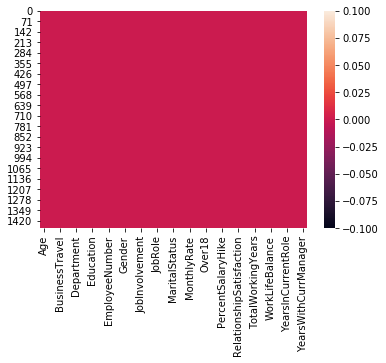

In [7]:
sns.heatmap(hr.isnull())
plt.show()

In [8]:
#There are no isnull values

In [9]:
#Check correlation
hr_cor=hr.corr()
hr_cor

Age  DailyRate  DistanceFromHome  Education  \
Age                       1.000000   0.010661         -0.001686   0.208034   
DailyRate                 0.010661   1.000000         -0.004985  -0.016806   
DistanceFromHome         -0.001686  -0.004985          1.000000   0.021042   
Education                 0.208034  -0.016806          0.021042   1.000000   
EmployeeNumber           -0.010145  -0.050990          0.032916   0.042070   
EnvironmentSatisfaction   0.010146   0.018355         -0.016075  -0.027128   
HourlyRate                0.024287   0.023381          0.031131   0.016775   
JobInvolvement            0.029820   0.046135          0.008783   0.042438   
JobLevel                  0.509604   0.002966          0.005303   0.101589   
JobSatisfaction          -0.004892   0.030571         -0.003669  -0.011296   
MonthlyIncome             0.497855   0.007707         -0.017014   0.094961   
MonthlyRate               0.028051  -0.032182          0.027473  -0.026084   
NumCompaniesWorked        0.299635   0.038153         -0.029251   0.126317   
PercentSalaryHike         0.003634   0.022704          0.040235  -0.011111   
PerformanceRating         0.001904   0.000473          0.027110  -0.024539   
RelationshipSatisfaction  0.053535   0.007846          0.006557  -0.009118   
StockOptionLevel          0.037510   0.042143          0.044872   0.018422   
TotalWorkingYears         0.680381   0.014515          0.004628   0.148280   
TrainingTimesLastYear    -0.019621   0.002453         -0.036942  -0.025100   
WorkLifeBalance          -0.021490  -0.037848         -0.026556   0.009819   
YearsAtCompany            0.311309  -0.034055          0.009508   0.069114   
YearsInCurrentRole        0.212901   0.009932          0.018845   0.060236   
YearsSinceLastPromotion   0.216513  -0.033229          0.010029   0.054254   
YearsWithCurrManager      0.202089  -0.026363          0.014406   0.069065   

                          EmployeeNumber  EnvironmentSatisfaction  HourlyRate  \
Age                            -0.010145                 0.010146    0.024287   
DailyRate                      -0.050990                 0.018355    0.023381   
DistanceFromHome                0.032916                -0.016075    0.031131   
Education                       0.042070                -0.027128    0.016775   
EmployeeNumber                  1.000000                 0.017621    0.035179   
EnvironmentSatisfaction         0.017621                 1.000000   -0.049857   
HourlyRate                      0.035179                -0.049857    1.000000   
JobInvolvement                 -0.006888                -0.008278    0.042861   
JobLevel                       -0.018519                 0.001212   -0.027853   
JobSatisfaction                -0.046247                -0.006784   -0.071335   
MonthlyIncome                  -0.014829                -0.006259   -0.015794   
MonthlyRate                     0.012648                 0.037600   -0.015297   
NumCompaniesWorked             -0.001251                 0.012594    0.022157   
PercentSalaryHike              -0.012944                -0.031701   -0.009062   
PerformanceRating              -0.020359                -0.029548   -0.002172   
RelationshipSatisfaction       -0.069861                 0.007665    0.001330   
StockOptionLevel                0.062227                 0.003432    0.050263   
TotalWorkingYears              -0.014365                -0.002693   -0.002334   
TrainingTimesLastYear           0.023603                -0.019359   -0.008548   
WorkLifeBalance                 0.010309                 0.027627   -0.004607   
YearsAtCompany                 -0.011240                 0.001458   -0.019582   
YearsInCurrentRole             -0.008416                 0.018007   -0.024106   
YearsSinceLastPromotion        -0.009019                 0.016194   -0.026716   
YearsWithCurrManager           -0.009197                -0.004999   -0.020123   

                          JobInvolvement  JobLevel  Jo

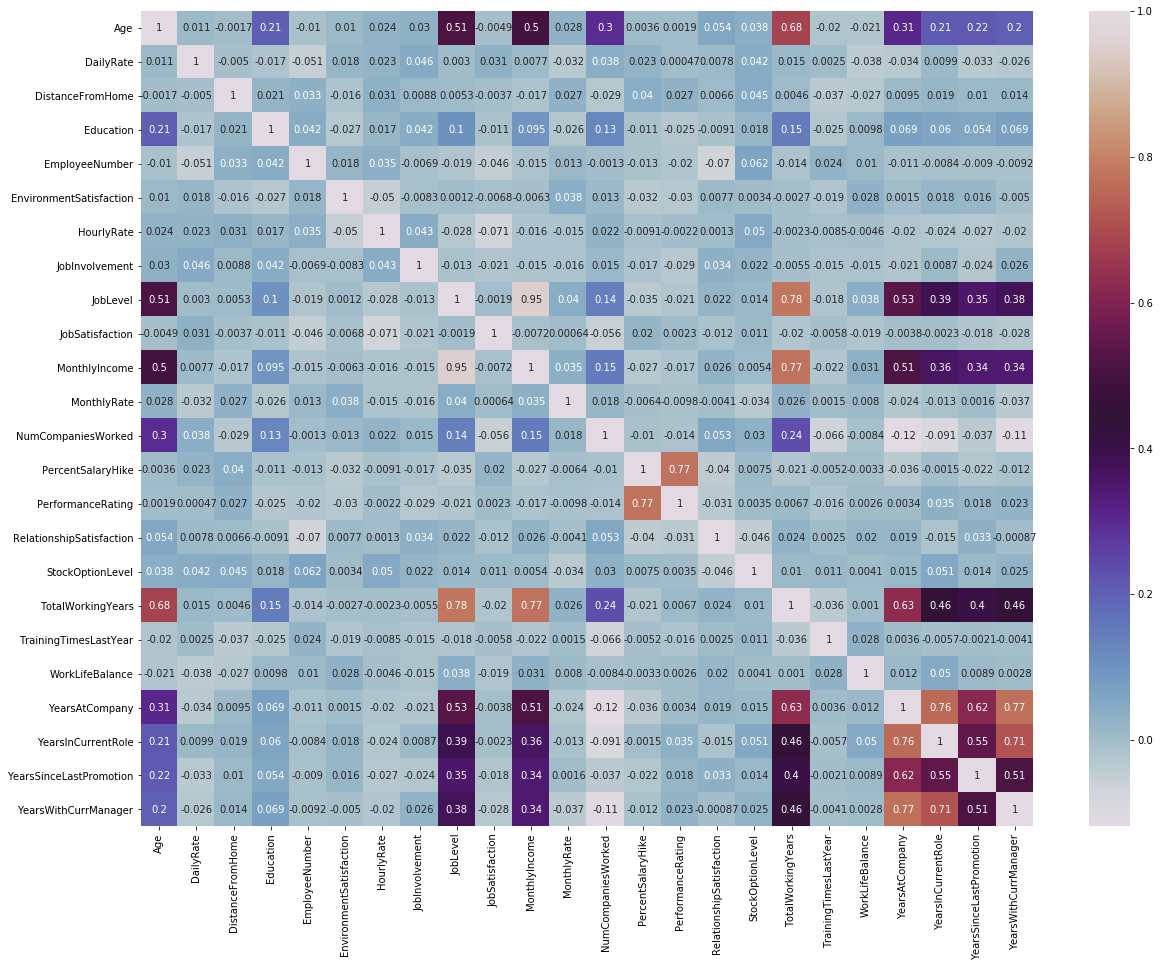

In [10]:
plt.figure(figsize=(20,15))
sns.heatmap(hr_cor,cmap='twilight',annot=True)
plt.show()

here Monthly Rate,Number of Companies Worked and Distance From Home are positively correlated to Attrition while Total Working Years Job Level and Years In Current Role are negatively correlated to Attrition.

In [11]:
hr.head()

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeNumber  \
0                 1          2  Life Sciences               1   
1                 8          1  Life Sciences               2   
2                 2          2          Other               4   
3                 3          4  Life Sciences               5   
4                 2          1        Medical               7   

   EnvironmentSatisfaction  ... PerformanceRating  RelationshipSatisfaction  \
0                        2  ...                 3                         1   
1                        3  ...                 4                         4   
2                        4  ...                 3                         2   
3                        4  ...                 3                         3   
4                        1  ...                 3                         4   

   StockOptionLevel  TotalWorkingYears TrainingTimesLastYear  WorkLifeBalance  \
0                 0                  8                     0                1   
1                 1                 10                     3                3   
2                 0                  7                     3                3   
3                 0                  8                     3                3   
4                 1                  6                     3                3   

  YearsAtCompany  YearsInCurrentRole  YearsSinceLastPromotion  \
0              6                   4                        0   
1             10                   7                        1   
2              0                   0                        0   
3              8                   7                        3   
4              2                   2                        2   

   YearsWithCurrManager  
0                     5  
1                     7  
2                     0  
3                     0  
4                     2  

[5 rows x 33 columns]

In [12]:
# firstly by using encoding change Attrition to integer 
from sklearn import preprocessing
le=preprocessing.LabelEncoder()

In [13]:
label=le.fit_transform(hr['Attrition'])
le.classes_

array(['No', 'Yes'], dtype=object)

In [14]:
hr.drop('Attrition',axis='columns')

Age     BusinessTravel  DailyRate              Department  \
0      41      Travel_Rarely       1102                   Sales   
1      49  Travel_Frequently        279  Research & Development   
2      37      Travel_Rarely       1373  Research & Development   
3      33  Travel_Frequently       1392  Research & Development   
4      27      Travel_Rarely        591  Research & Development   
...   ...                ...        ...                     ...   
1465   36  Travel_Frequently        884  Research & Development   
1466   39      Travel_Rarely        613  Research & Development   
1467   27      Travel_Rarely        155  Research & Development   
1468   49  Travel_Frequently       1023                   Sales   
1469   34      Travel_Rarely        628  Research & Development   

      DistanceFromHome  Education EducationField  EmployeeNumber  \
0                    1          2  Life Sciences               1   
1                    8          1  Life Sciences               2   
2                    2          2          Other               4   
3                    3          4  Life Sciences               5   
4                    2          1        Medical               7   
...                ...        ...            ...             ...   
1465                23          2        Medical            2061   
1466                 6          1        Medical            2062   
1467                 4          3  Life Sciences            2064   
1468                 2          3        Medical            2065   
1469                 8          3        Medical            2068   

      EnvironmentSatisfaction  Gender  ...  PerformanceRating  \
0                           2  Female  ...                  3   
1                           3    Male  ...                  4   
2                           4    Male  ...                  3   
3                           4  Female  ...                  3   
4                           1    Male  ...                  3   
...                       ...     ...  ...                ...   
1465                        3    Male  ...                  3   
1466                        4    Male  ...                  3   
1467                        2    Male  ...                  4   
1468                        4    Male  ...                  3   
1469                        2    Male  ...                  3   

      RelationshipSatisfaction  StockOptionLevel TotalWorkingYears  \
0                            1                 0                 8   
1                            4                 1                10   
2                            2                 0                 7   
3                            3                 0                 8   
4                            4                 1                 6   
...                        ...               ...               ...   
1465                         3                 1                17   
1466                         1                 1                 9   
1467                         2                 1                 6   
1468                         4                 0                17   
1469                         1                 0                 6   

      TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  \
0                         0               1               6   
1                         3               3              10   
2                         3               3               0   
3                         3               3               8   
4                         3               3               2   
...                     ...             ...             ...   
1465                      3               3               5   
1466                      5               3               7   
1467                      0               3               6   
1468                      3               2               9   
1469                      3               4               4   

     

In [15]:
hr['Attrition']=label
hr.head()

Age  Attrition     BusinessTravel  DailyRate              Department  \
0   41          1      Travel_Rarely       1102                   Sales   
1   49          0  Travel_Frequently        279  Research & Development   
2   37          1      Travel_Rarely       1373  Research & Development   
3   33          0  Travel_Frequently       1392  Research & Development   
4   27          0      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeNumber  \
0                 1          2  Life Sciences               1   
1                 8          1  Life Sciences               2   
2                 2          2          Other               4   
3                 3          4  Life Sciences               5   
4                 2          1        Medical               7   

   EnvironmentSatisfaction  ... PerformanceRating  RelationshipSatisfaction  \
0                        2  ...                 3                         1   
1                        3  ...                 4                         4   
2                        4  ...                 3                         2   
3                        4  ...                 3                         3   
4                        1  ...                 3                         4   

   StockOptionLevel  TotalWorkingYears TrainingTimesLastYear  WorkLifeBalance  \
0                 0                  8                     0                1   
1                 1                 10                     3                3   
2                 0                  7                     3                3   
3                 0                  8                     3                3   
4                 1                  6                     3                3   

  YearsAtCompany  YearsInCurrentRole  YearsSinceLastPromotion  \
0              6                   4                        0   
1             10                   7                        1   
2              0                   0                        0   
3              8                   7                        3   
4              2                   2                        2   

   YearsWithCurrManager  
0                     5  
1                     7  
2                     0  
3                     0  
4                     2  

[5 rows x 33 columns]

In [16]:
# yes=1,no=0

In [17]:
hr.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18',
       'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

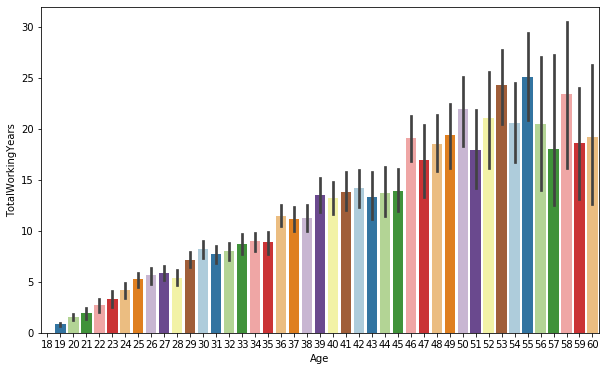

In [18]:
plt.figure(figsize=(10,6))
sns.barplot(x='Age',y='TotalWorkingYears',data=hr,palette='Paired')
plt.show()

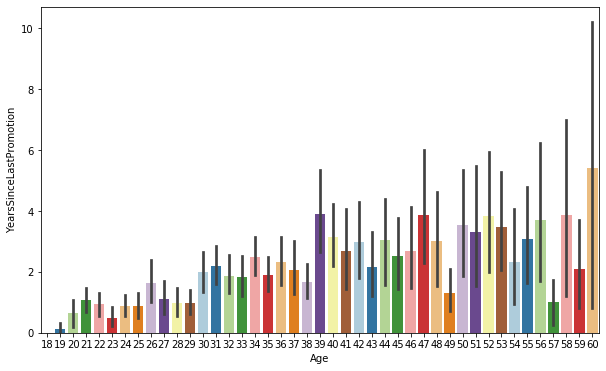

In [19]:
plt.figure(figsize=(10,6))
sns.barplot(x='Age',y='YearsSinceLastPromotion',data=hr,palette='Paired')
plt.show()

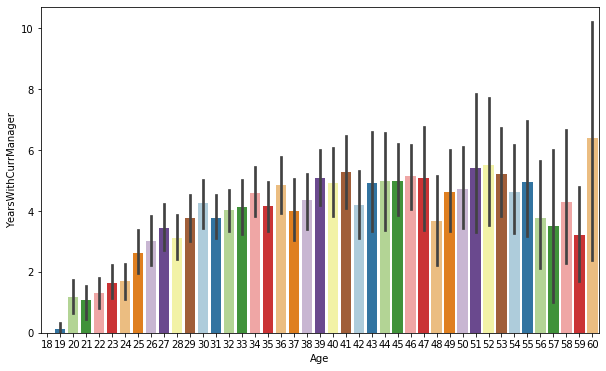

In [20]:
plt.figure(figsize=(10,6))
sns.barplot(x='Age',y='YearsWithCurrManager',data=hr,palette='Paired')
plt.show()

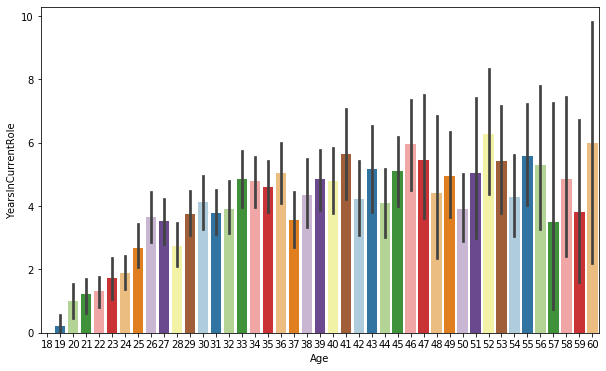

In [21]:
plt.figure(figsize=(10,6))
sns.barplot(x='Age',y='YearsInCurrentRole',data=hr,palette='Paired')
plt.show()

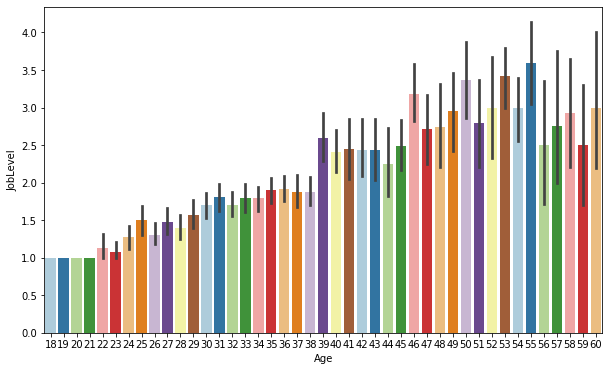

In [22]:
plt.figure(figsize=(10,6))
sns.barplot(x='Age',y='JobLevel',data=hr,palette='Paired')
plt.show()

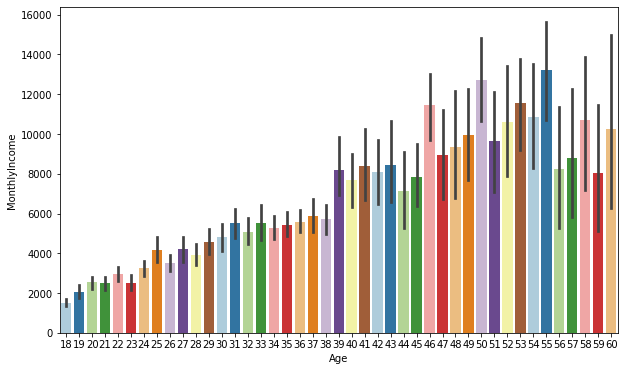

In [23]:
plt.figure(figsize=(10,6))
sns.barplot(x='Age',y='MonthlyIncome',data=hr,palette='Paired')
plt.show()

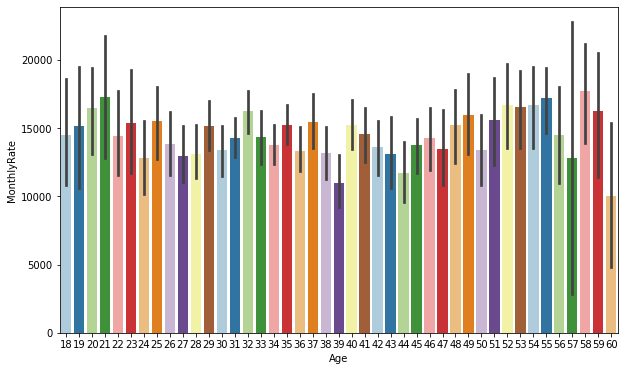

In [24]:
plt.figure(figsize=(10,6))
sns.barplot(x='Age',y='MonthlyRate',data=hr,palette='Paired')
plt.show()

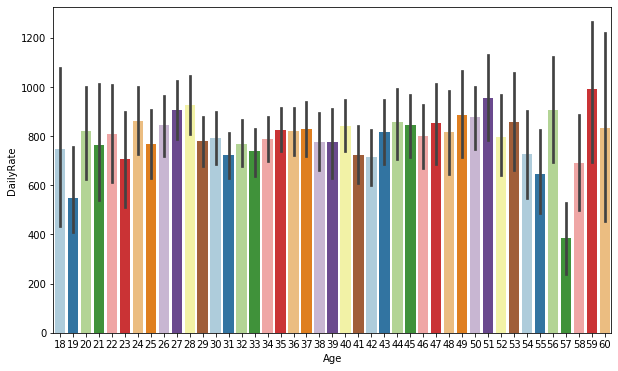

In [25]:
plt.figure(figsize=(10,6))
sns.barplot(x='Age',y='DailyRate',data=hr,palette='Paired')
plt.show()

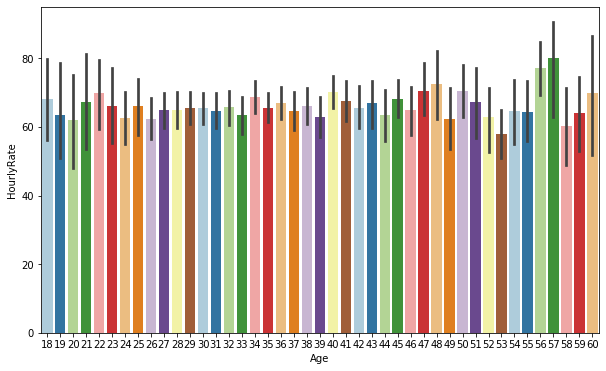

In [26]:
plt.figure(figsize=(10,6))
sns.barplot(x='Age',y='HourlyRate',data=hr,palette='Paired')
plt.show()

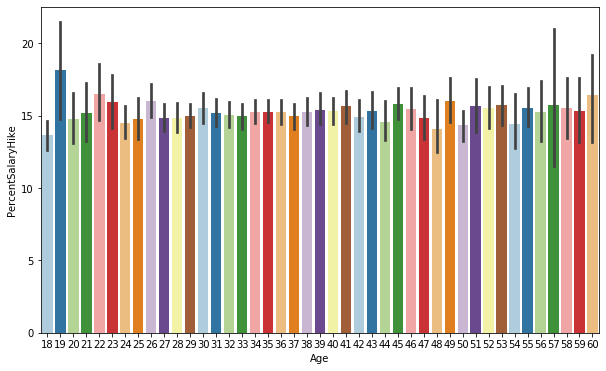

In [27]:
plt.figure(figsize=(10,6))
sns.barplot(x='Age',y='PercentSalaryHike',data=hr,palette='Paired')
plt.show()

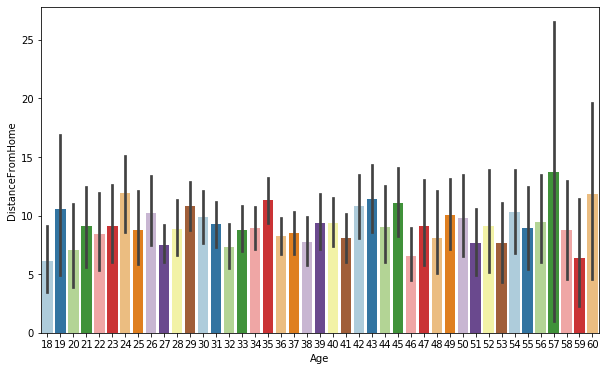

In [28]:
plt.figure(figsize=(10,6))
sns.barplot(x='Age',y='DistanceFromHome',data=hr,palette='Paired')
plt.show()

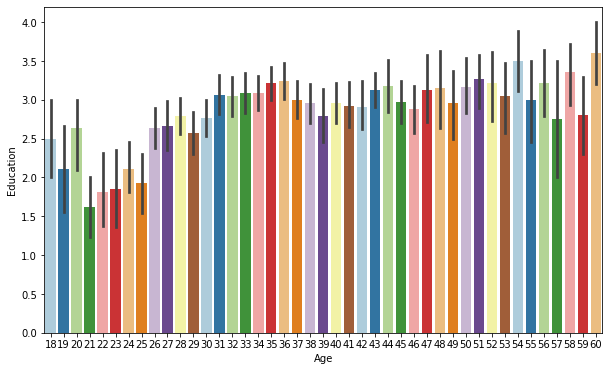

In [29]:
plt.figure(figsize=(10,6))
sns.barplot(x='Age',y='Education',data=hr,palette='Paired')
plt.show()

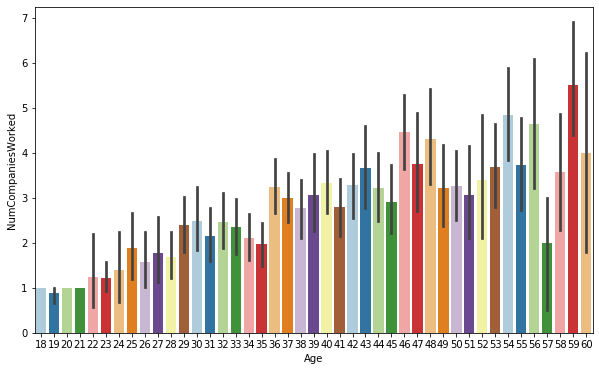

In [30]:
plt.figure(figsize=(10,6))
sns.barplot(x='Age',y='NumCompaniesWorked',data=hr,palette='Paired')
plt.show()

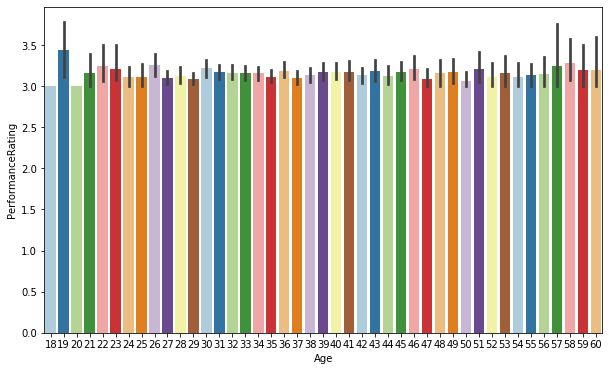

In [31]:
plt.figure(figsize=(10,6))
sns.barplot(x='Age',y='PerformanceRating',data=hr,palette='Paired')
plt.show()

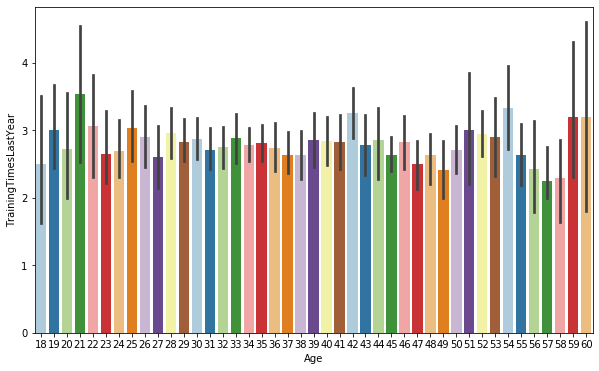

In [32]:
plt.figure(figsize=(10,6))
sns.barplot(x='Age',y='TrainingTimesLastYear',data=hr,palette='Paired')
plt.show()

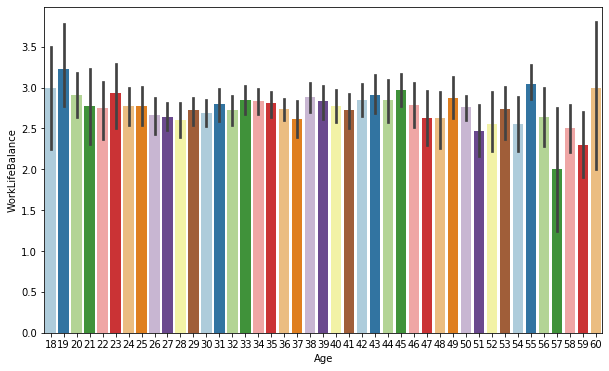

In [33]:
plt.figure(figsize=(10,6))
sns.barplot(x='Age',y='WorkLifeBalance',data=hr,palette='Paired')
plt.show()

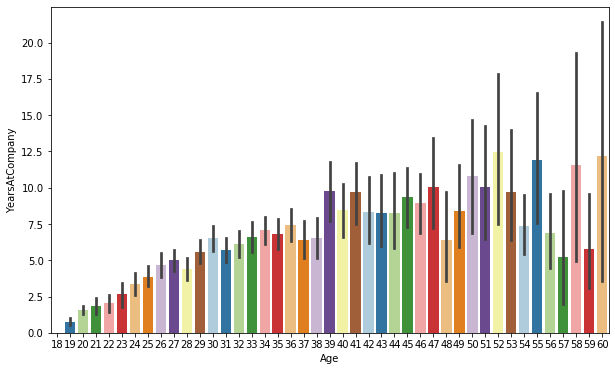

In [34]:
plt.figure(figsize=(10,6))
sns.barplot(x='Age',y='YearsAtCompany',data=hr,palette='Paired')
plt.show()

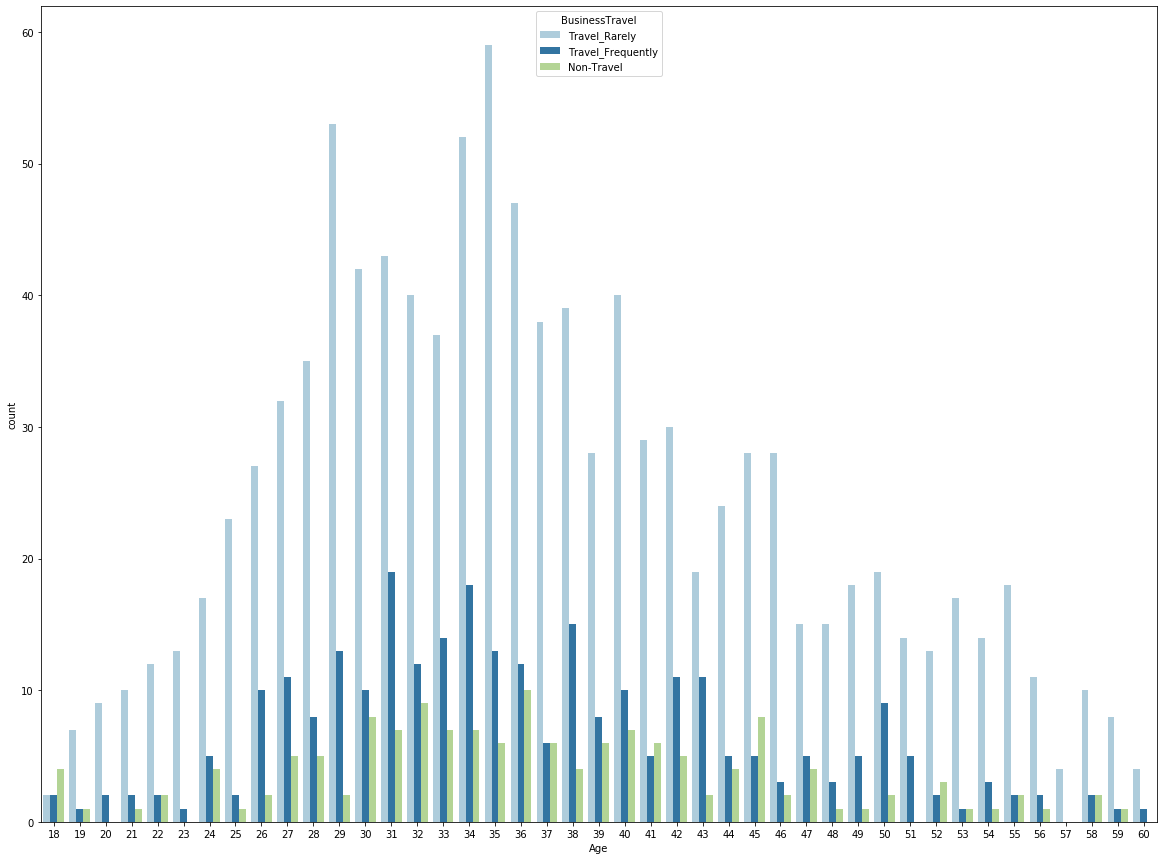

In [35]:
plt.figure(figsize=(20,15))
sns.countplot(x='Age',hue='BusinessTravel',data=hr,palette='Paired')
plt.show()

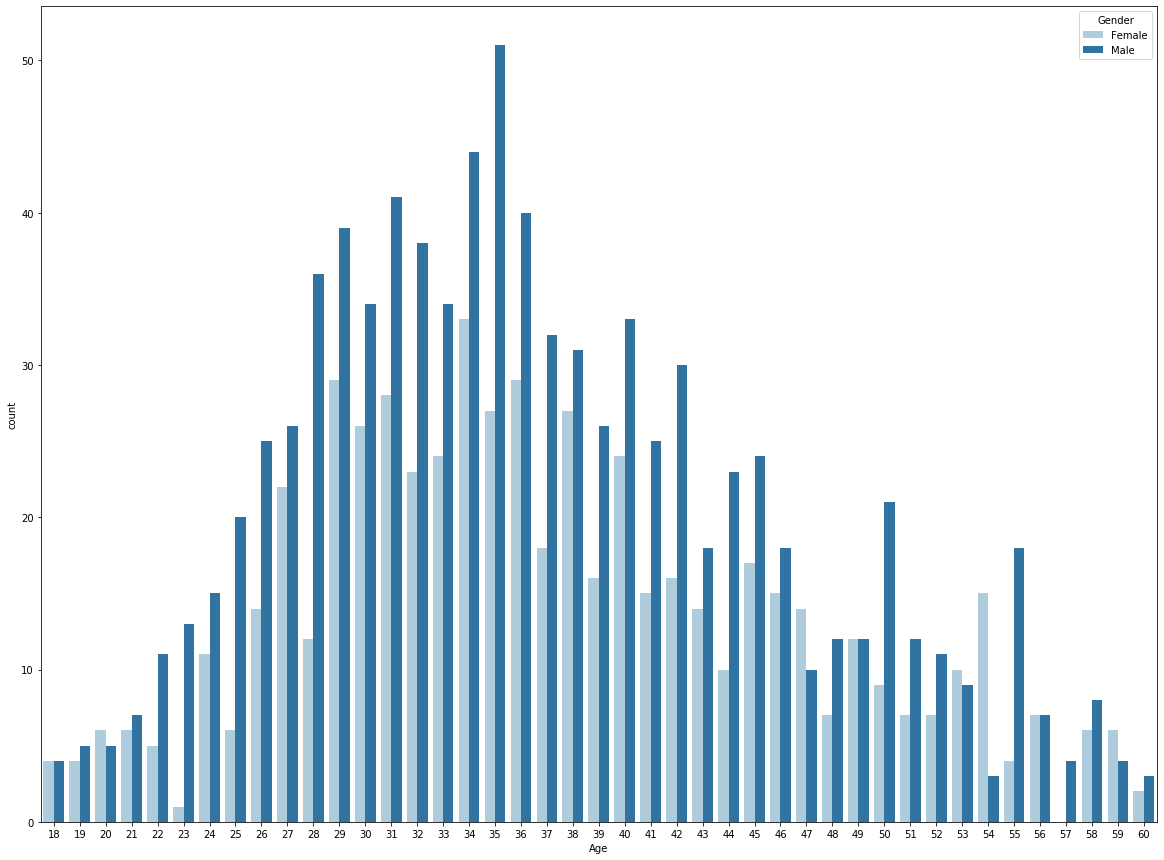

In [36]:
plt.figure(figsize=(20,15))
sns.countplot(x='Age',hue='Gender',data=hr,palette='Paired')
plt.show()

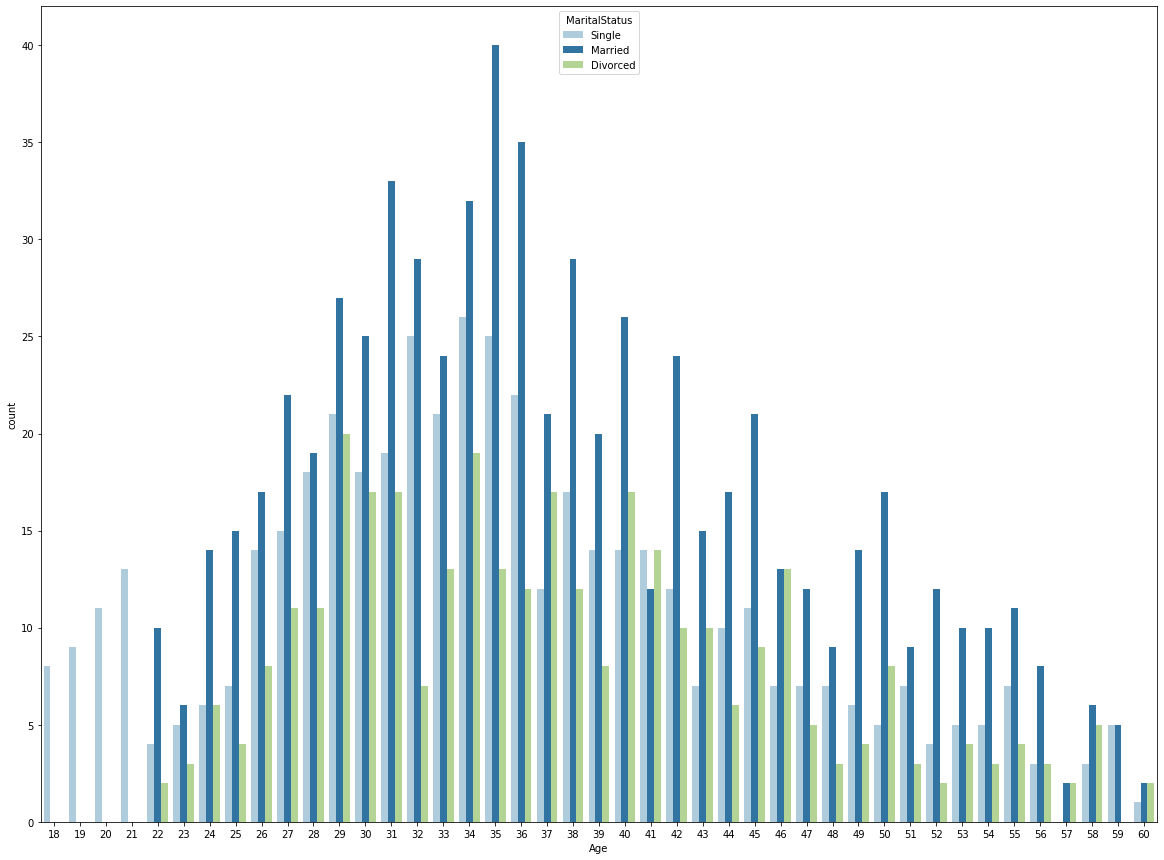

In [37]:
plt.figure(figsize=(20,15))
sns.countplot(x='Age',hue='MaritalStatus',data=hr,palette='Paired')
plt.show()

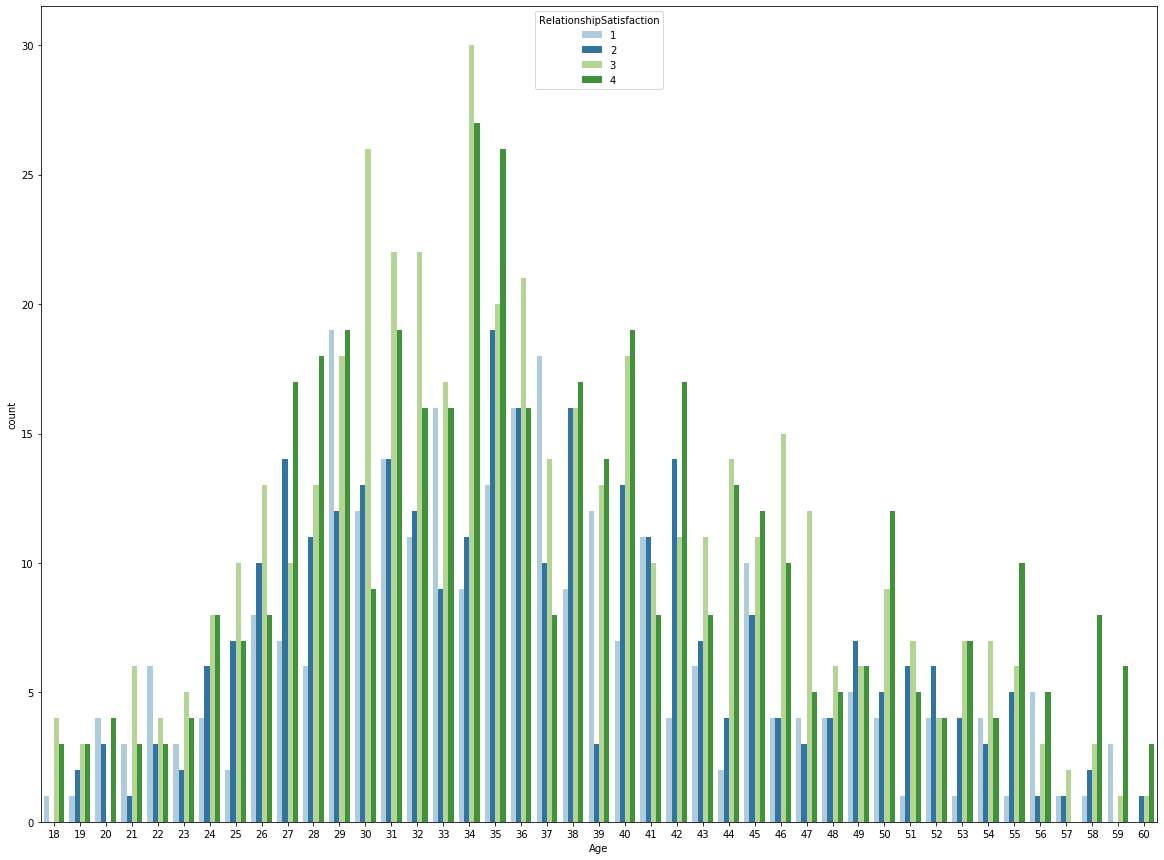

In [38]:
plt.figure(figsize=(20,15))
sns.countplot(x='Age',hue='RelationshipSatisfaction',data=hr,palette='Paired')
plt.show()

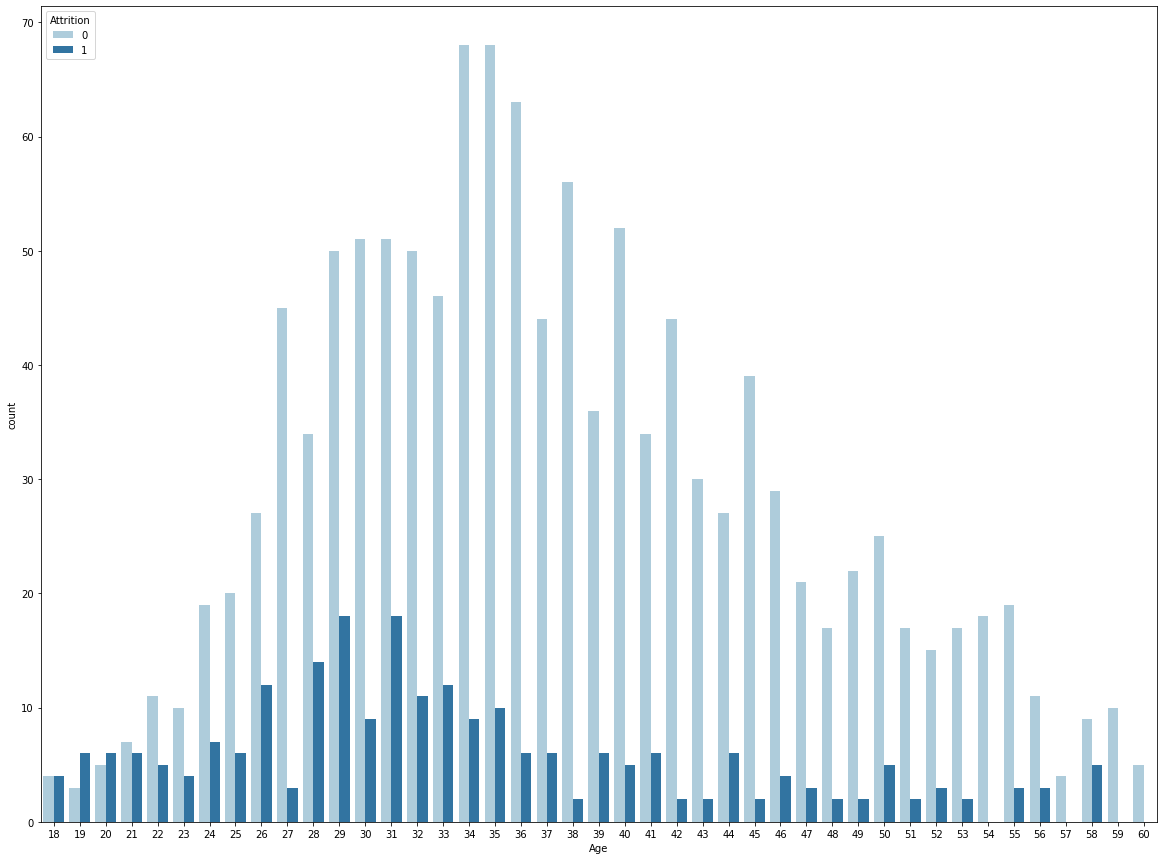

In [39]:
plt.figure(figsize=(20,15))
sns.countplot(x='Age',hue='Attrition',data=hr,palette='Paired')
plt.show()

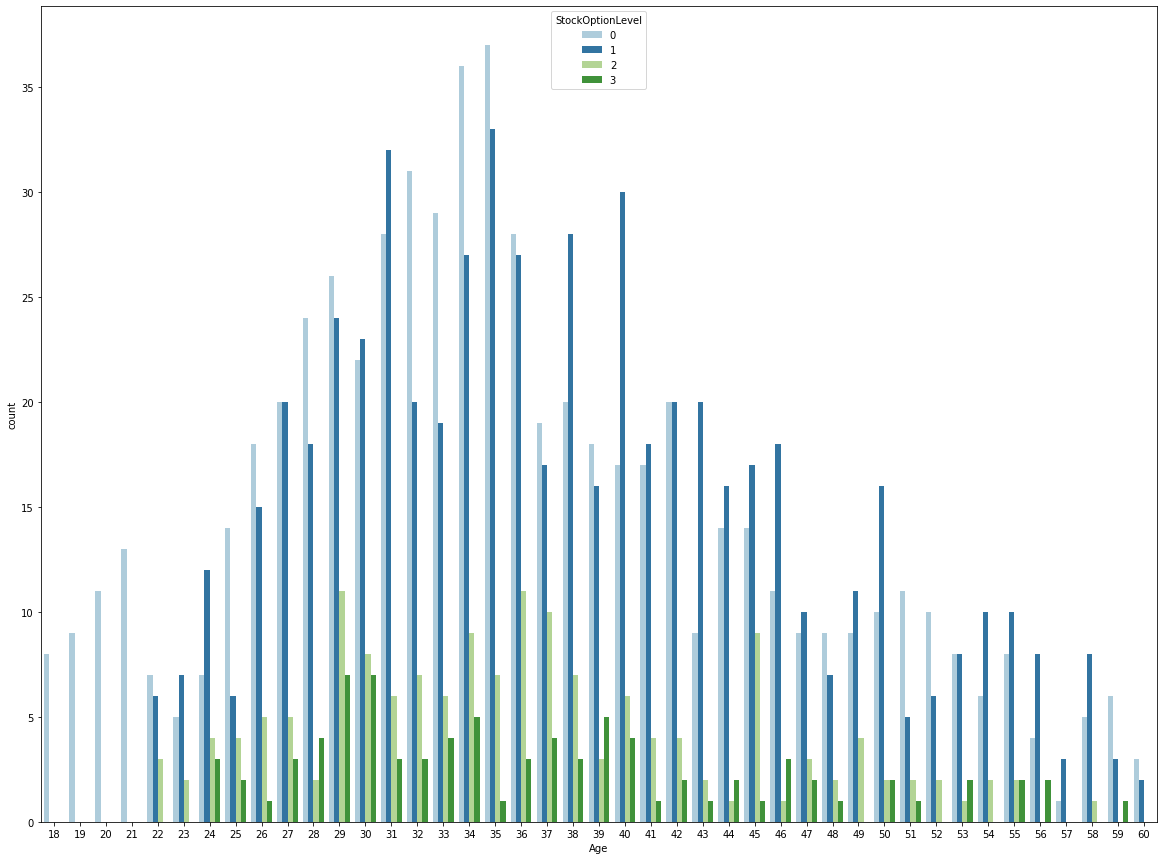

In [40]:
plt.figure(figsize=(20,15))
sns.countplot(x='Age',hue='StockOptionLevel',data=hr,palette='Paired')
plt.show()

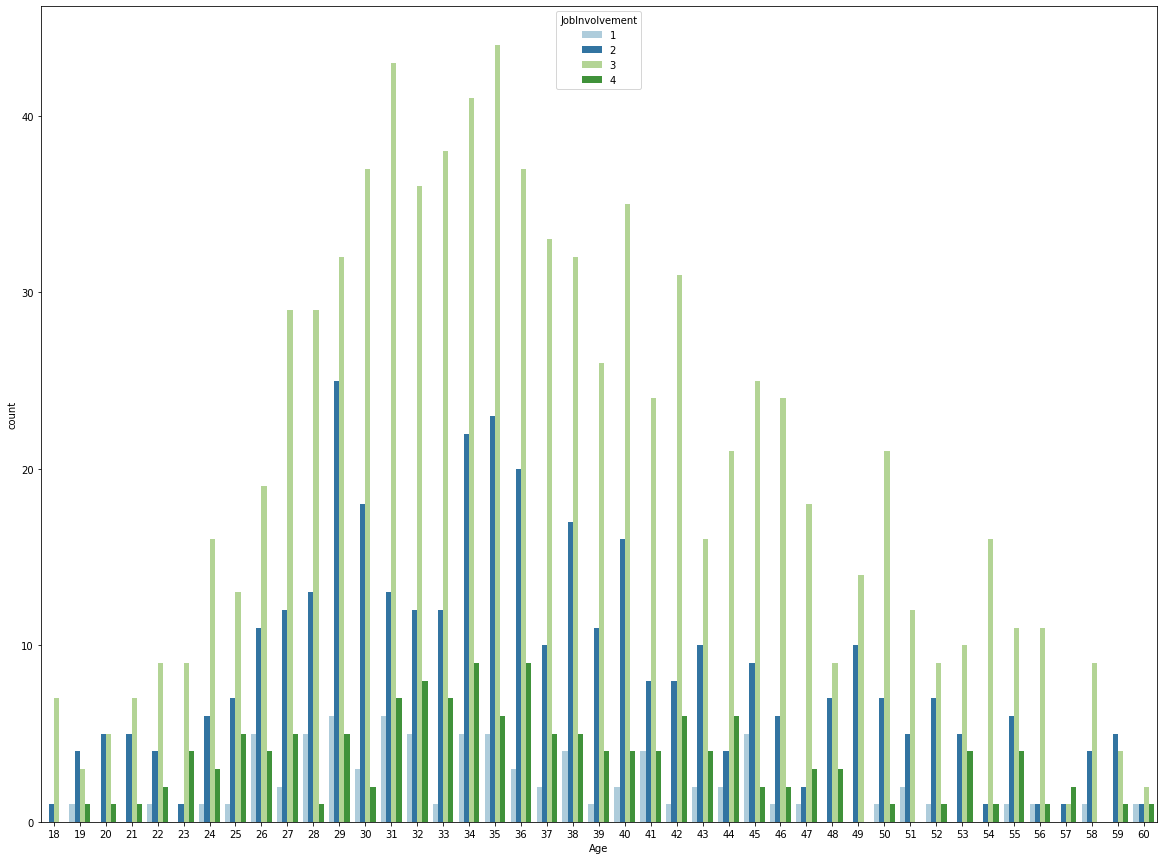

In [41]:
plt.figure(figsize=(20,15))
sns.countplot(x='Age',hue='JobInvolvement',data=hr,palette='Paired')
plt.show()

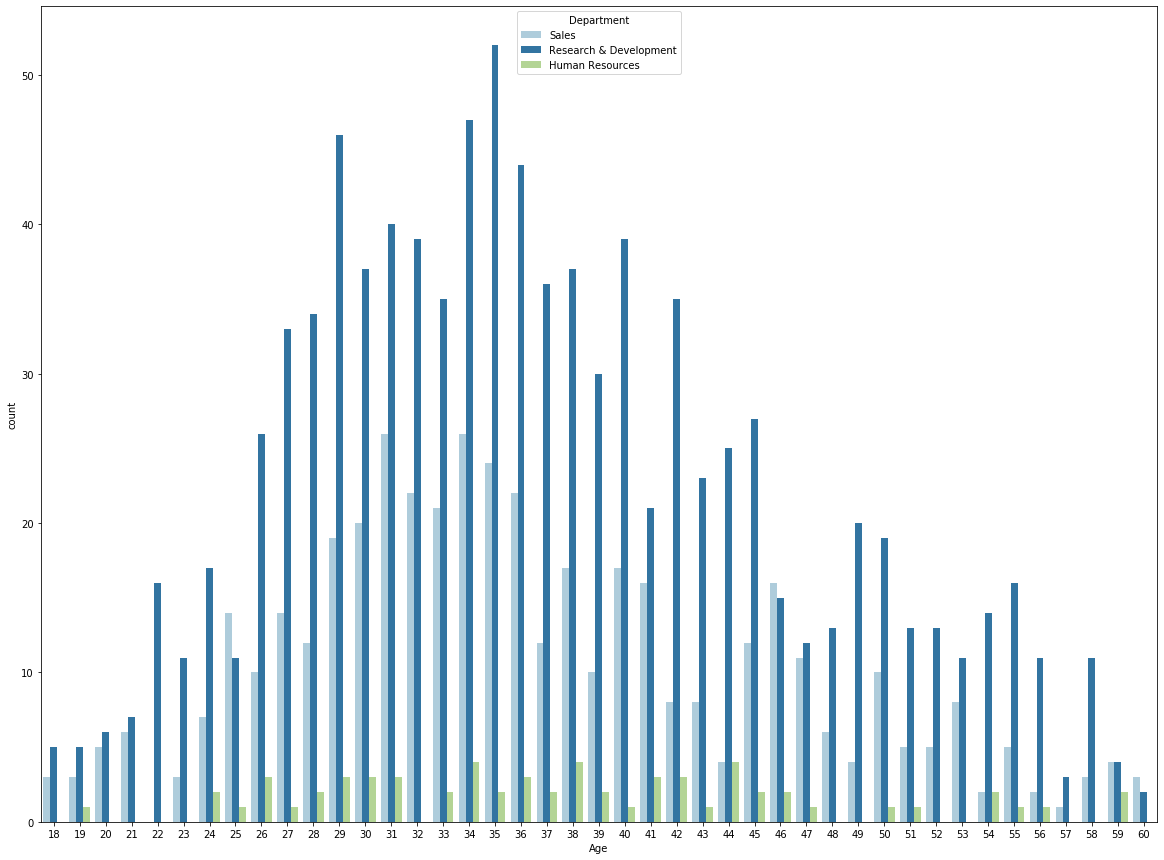

In [42]:
plt.figure(figsize=(20,15))
sns.countplot(x='Age',hue='Department',data=hr,palette='Paired')
plt.show()

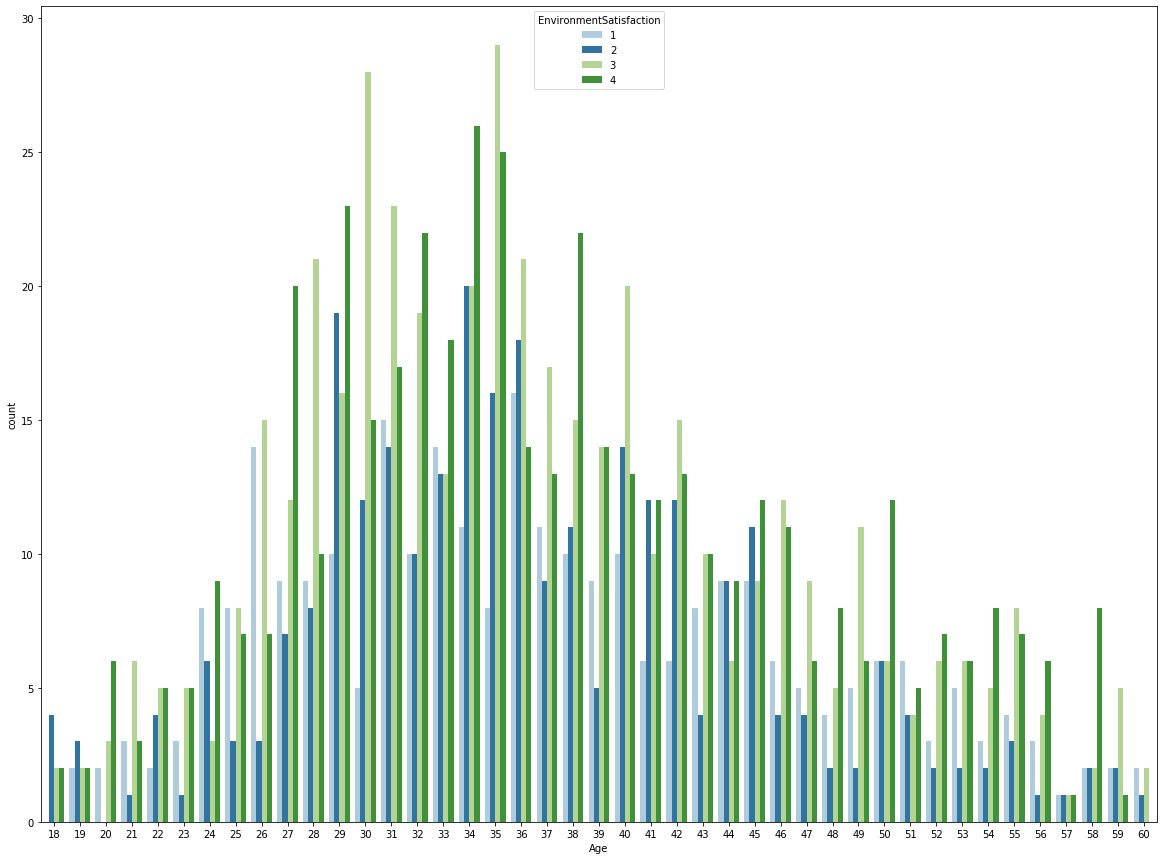

In [43]:
plt.figure(figsize=(20,15))
sns.countplot(x='Age',hue='EnvironmentSatisfaction',data=hr,palette='Paired')
plt.show()

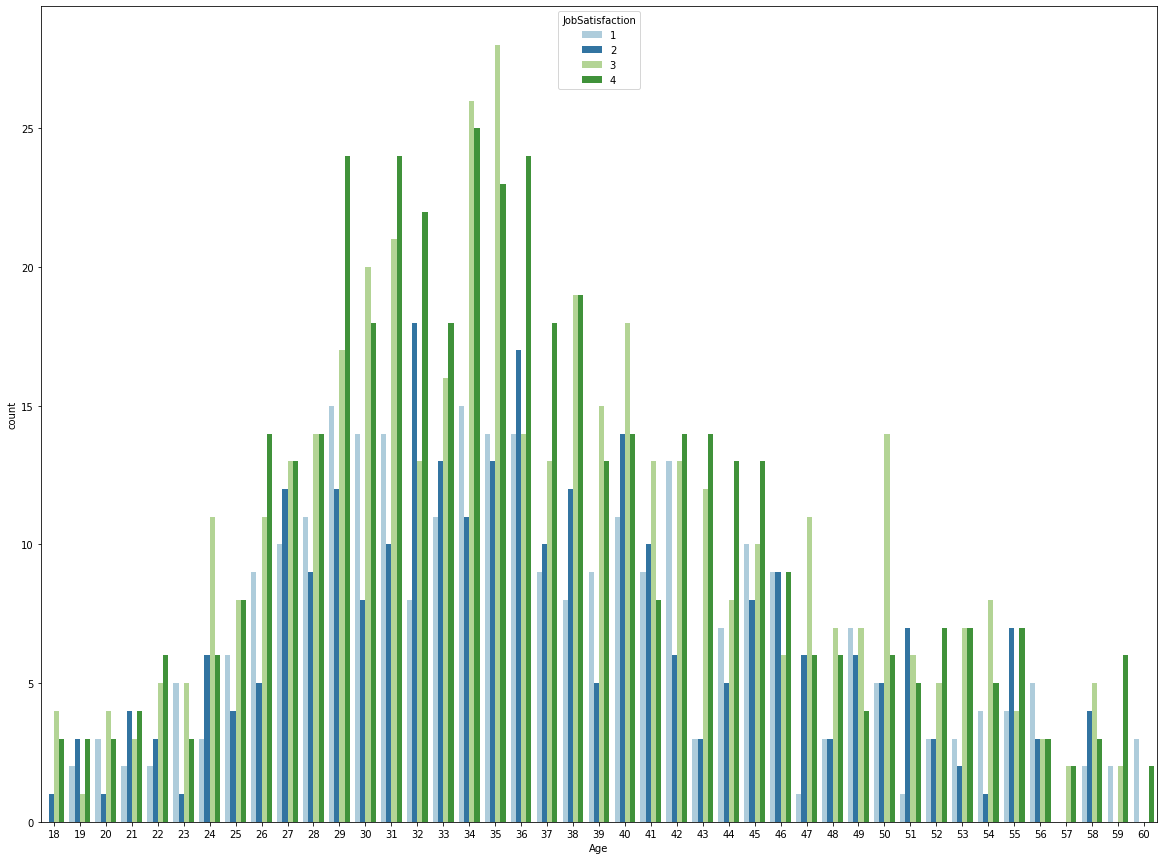

In [44]:
plt.figure(figsize=(20,15))
sns.countplot(x='Age',hue='JobSatisfaction',data=hr,palette='Paired')
plt.show()

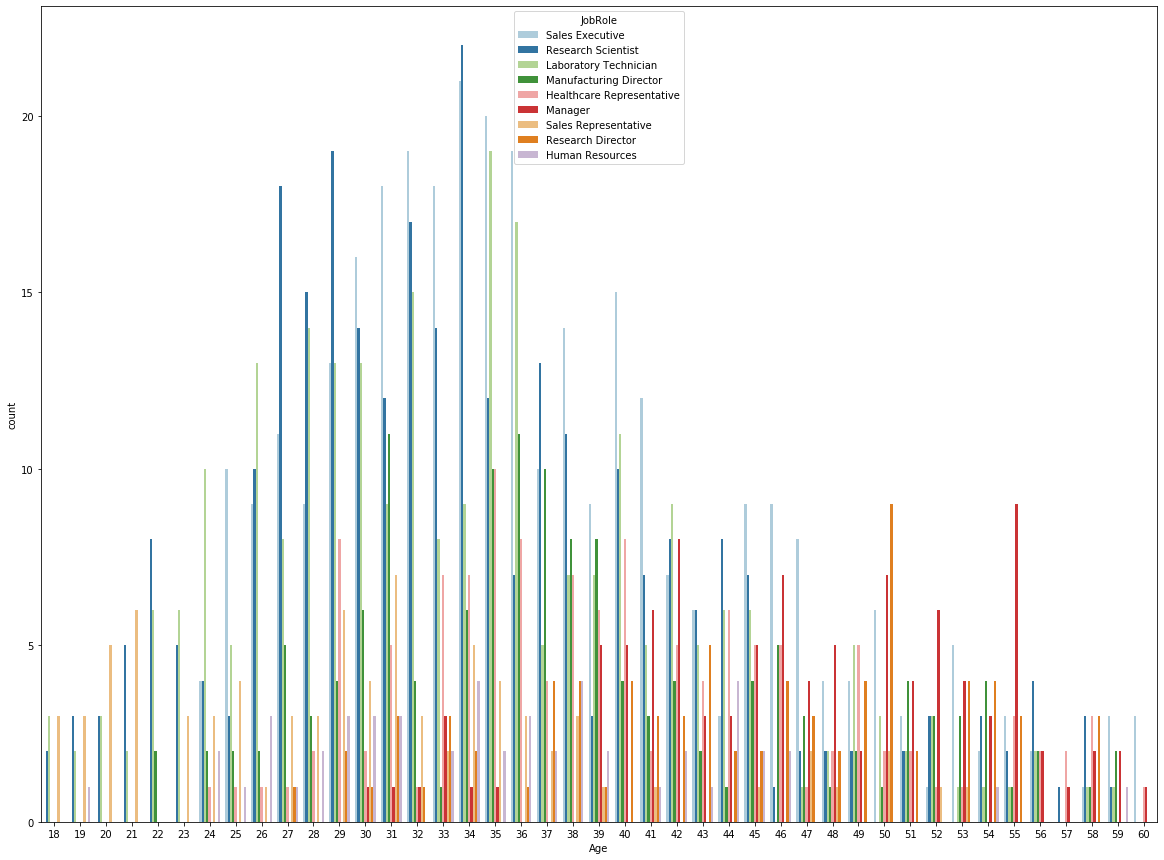

In [45]:
plt.figure(figsize=(20,15))
sns.countplot(x='Age',hue='JobRole',data=hr,palette='Paired')
plt.show()

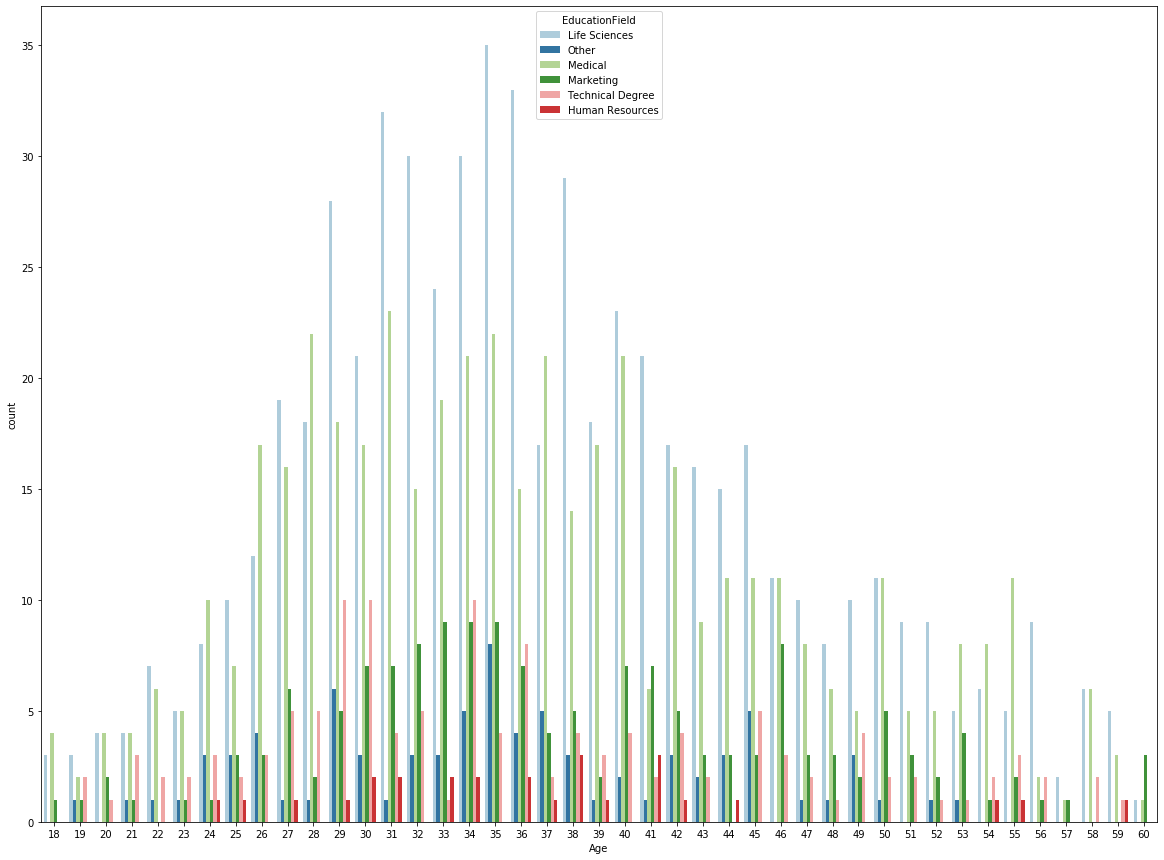

In [46]:
plt.figure(figsize=(20,15))
sns.countplot(x='Age',hue='EducationField',data=hr,palette='Paired')
plt.show()

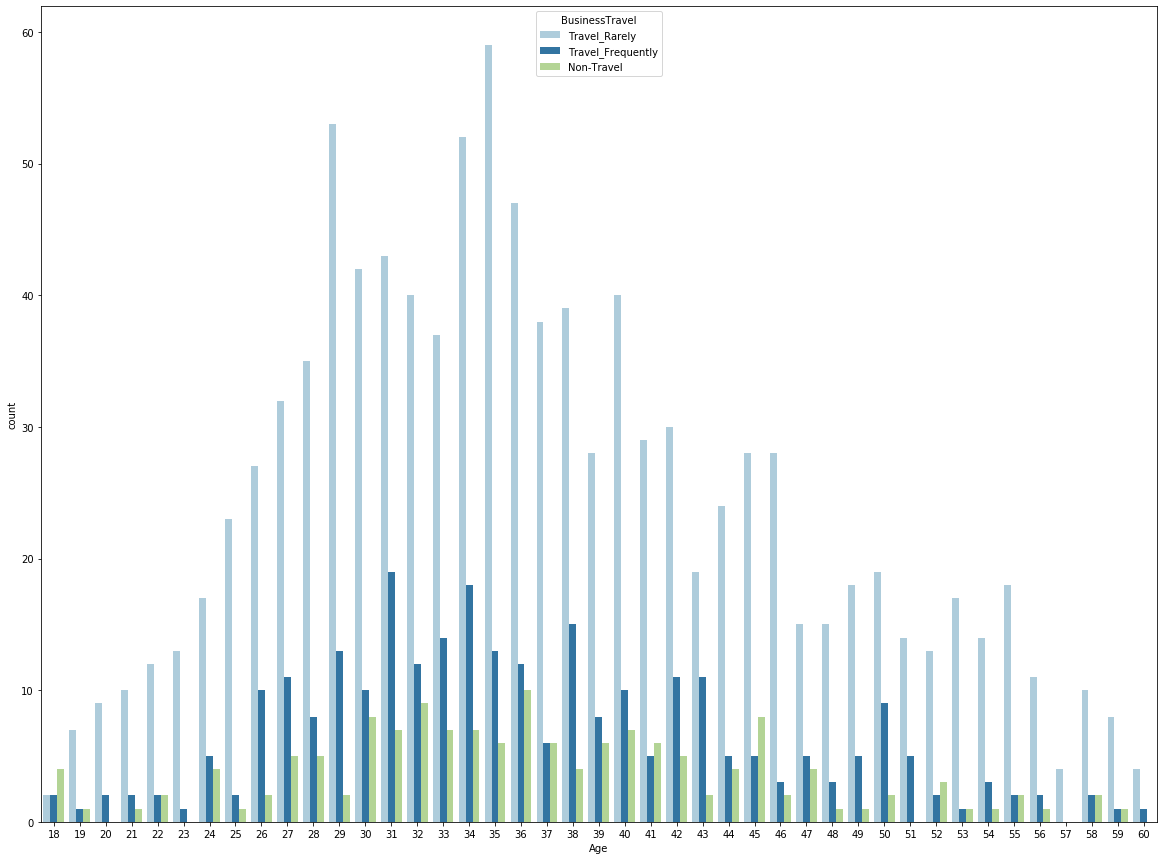

In [47]:
plt.figure(figsize=(20,15))
sns.countplot(x='Age',hue='BusinessTravel',data=hr,palette='Paired')
plt.show()

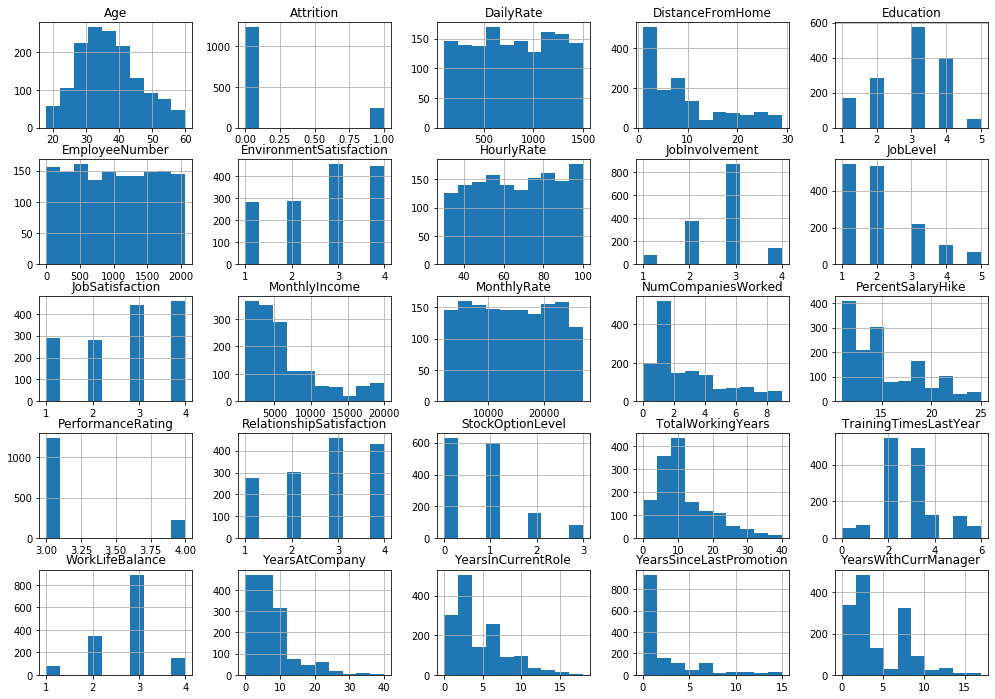

In [48]:
hr.hist(figsize=(17,12))
plt.show()

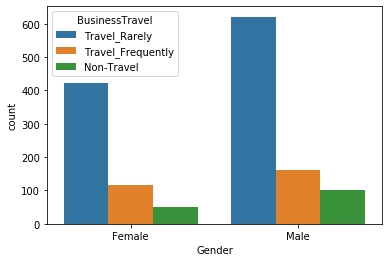

In [49]:
sns.countplot(x='Gender',hue='BusinessTravel',data=hr)
plt.show()

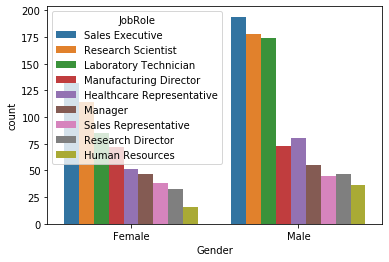

In [50]:
sns.countplot(x='Gender',hue='JobRole',data=hr)
plt.show()

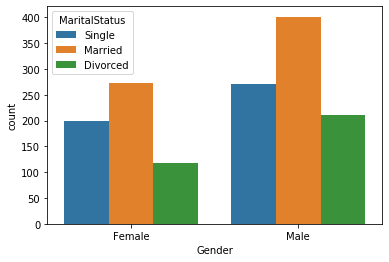

In [51]:
sns.countplot(x='Gender',hue='MaritalStatus',data=hr)
plt.show()

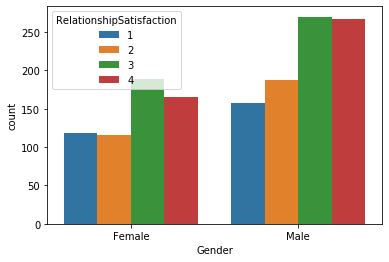

In [52]:
sns.countplot(x='Gender',hue='RelationshipSatisfaction',data=hr)
plt.show()

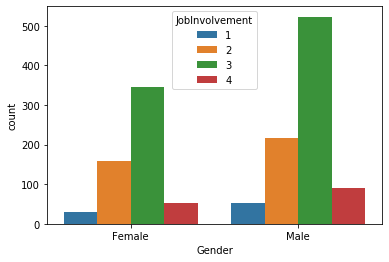

In [53]:
sns.countplot(x='Gender',hue='JobInvolvement',data=hr)
plt.show()

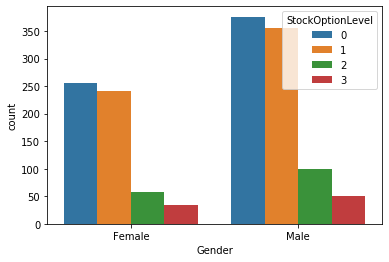

In [54]:
sns.countplot(x='Gender',hue='StockOptionLevel',data=hr)
plt.show()

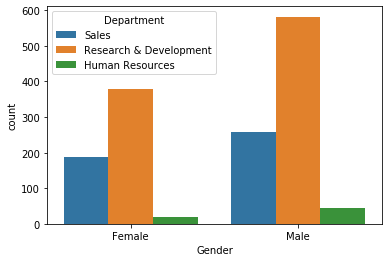

In [55]:
sns.countplot(x='Gender',hue='Department',data=hr)
plt.show()

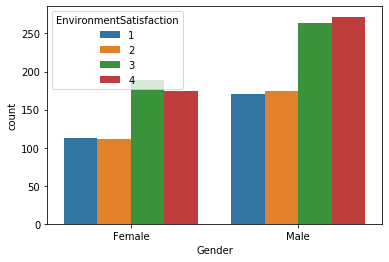

In [56]:
sns.countplot(x='Gender',hue='EnvironmentSatisfaction',data=hr)
plt.show()

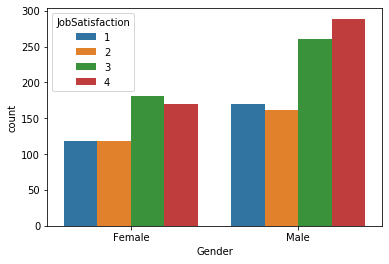

In [57]:
sns.countplot(x='Gender',hue='JobSatisfaction',data=hr)
plt.show()

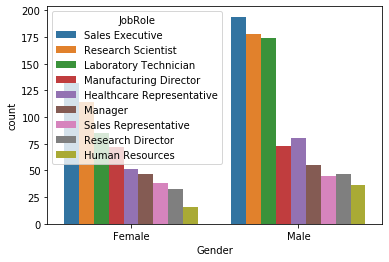

In [58]:
sns.countplot(x='Gender',hue='JobRole',data=hr)
plt.show()

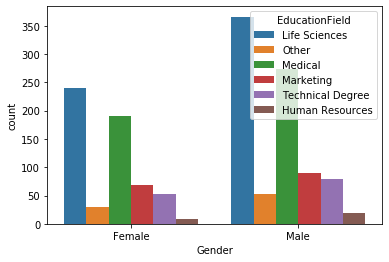

In [59]:
sns.countplot(x='Gender',hue='EducationField',data=hr)
plt.show()

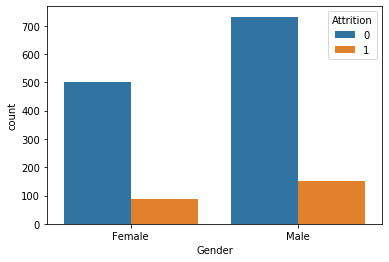

In [60]:
sns.countplot(x='Gender',hue='Attrition',data=hr)
plt.show()

In [61]:
#label encoing used
le_count=0
for col in hr.columns[1:]:
    if hr[col].dtype=='object':
        if len(list(hr[col].unique())) <=2:
            le.fit(hr[col])
            hr[col]=le.transform(hr[col])
            le_count +=1
print('{}columns were label encoded.'.format(le_count))

3columns were label encoded.


In [62]:
hr.head()

Age  Attrition     BusinessTravel  DailyRate              Department  \
0   41          1      Travel_Rarely       1102                   Sales   
1   49          0  Travel_Frequently        279  Research & Development   
2   37          1      Travel_Rarely       1373  Research & Development   
3   33          0  Travel_Frequently       1392  Research & Development   
4   27          0      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeNumber  \
0                 1          2  Life Sciences               1   
1                 8          1  Life Sciences               2   
2                 2          2          Other               4   
3                 3          4  Life Sciences               5   
4                 2          1        Medical               7   

   EnvironmentSatisfaction  ...  PerformanceRating  RelationshipSatisfaction  \
0                        2  ...                  3                         1   
1                        3  ...                  4                         4   
2                        4  ...                  3                         2   
3                        4  ...                  3                         3   
4                        1  ...                  3                         4   

   StockOptionLevel  TotalWorkingYears TrainingTimesLastYear  WorkLifeBalance  \
0                 0                  8                     0                1   
1                 1                 10                     3                3   
2                 0                  7                     3                3   
3                 0                  8                     3                3   
4                 1                  6                     3                3   

  YearsAtCompany  YearsInCurrentRole  YearsSinceLastPromotion  \
0              6                   4                        0   
1             10                   7                        1   
2              0                   0                        0   
3              8                   7                        3   
4              2                   2                        2   

   YearsWithCurrManager  
0                     5  
1                     7  
2                     0  
3                     0  
4                     2  

[5 rows x 33 columns]

In [63]:
hv=hr.drop(columns=['BusinessTravel','Department','EducationField','JobRole','MaritalStatus'])
hv.dtypes

Age                         int64
Attrition                   int32
DailyRate                   int64
DistanceFromHome            int64
Education                   int64
EmployeeNumber              int64
EnvironmentSatisfaction     int64
Gender                      int32
HourlyRate                  int64
JobInvolvement              int64
JobLevel                    int64
JobSatisfaction             int64
MonthlyIncome               int64
MonthlyRate                 int64
NumCompaniesWorked          int64
Over18                      int32
OverTime                    int32
PercentSalaryHike           int64
PerformanceRating           int64
RelationshipSatisfaction    int64
StockOptionLevel            int64
TotalWorkingYears           int64
TrainingTimesLastYear       int64
WorkLifeBalance             int64
YearsAtCompany              int64
YearsInCurrentRole          int64
YearsSinceLastPromotion     int64
YearsWithCurrManager        int64
dtype: object

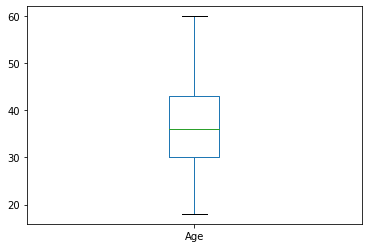

In [64]:
hr['Age'].plot.box()
plt.show()

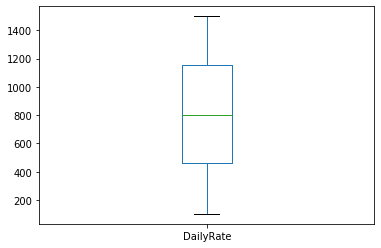

In [65]:
hr['DailyRate'].plot.box()
plt.show()

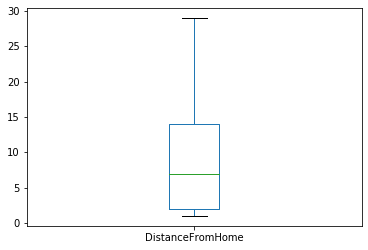

In [66]:
hr['DistanceFromHome'].plot.box()
plt.show()

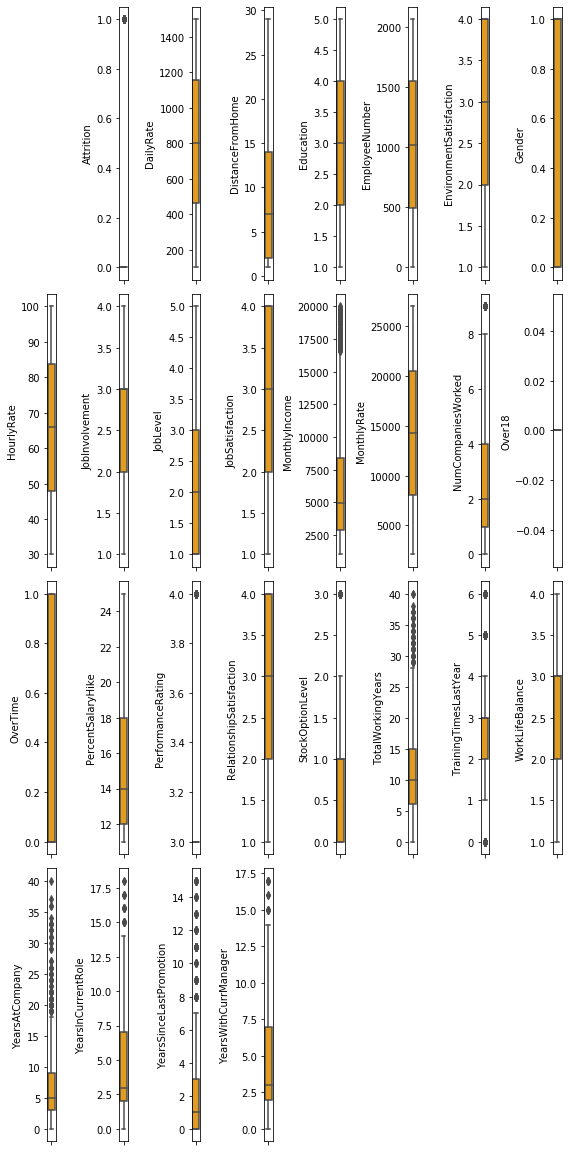

In [67]:
collist=hv.columns.values
ncol=8
nrows=10
plt.figure(figsize=(ncol,5*ncol))
for i in range(1, len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(hv[collist[i]],color='orange',orient='v')
    plt.tight_layout()

# TO CHECK SKEWNESS

In [68]:
hr.skew()

Age                         0.413286
Attrition                   1.844366
DailyRate                  -0.003519
DistanceFromHome            0.958118
Education                  -0.289681
EmployeeNumber              0.016574
EnvironmentSatisfaction    -0.321654
Gender                     -0.408665
HourlyRate                 -0.032311
JobInvolvement             -0.498419
JobLevel                    1.025401
JobSatisfaction            -0.329672
MonthlyIncome               1.369817
MonthlyRate                 0.018578
NumCompaniesWorked          1.026471
Over18                      0.000000
OverTime                    0.964489
PercentSalaryHike           0.821128
PerformanceRating           1.921883
RelationshipSatisfaction   -0.302828
StockOptionLevel            0.968980
TotalWorkingYears           1.117172
TrainingTimesLastYear       0.553124
WorkLifeBalance            -0.552480
YearsAtCompany              1.764529
YearsInCurrentRole          0.917363
YearsSinceLastPromotion     1.984290
Y

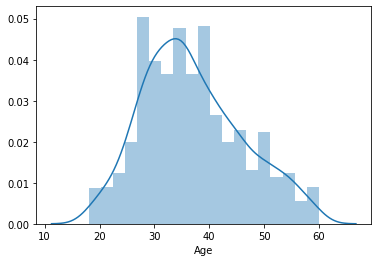

In [69]:
sns.distplot(hr['Age'])

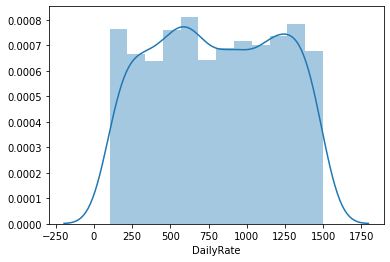

In [70]:
sns.distplot(hr['DailyRate'])

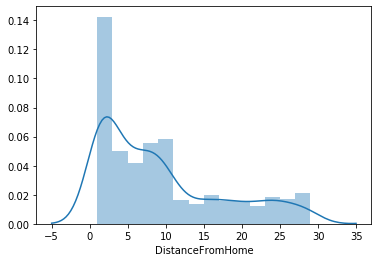

In [71]:
sns.distplot(hr['DistanceFromHome'])

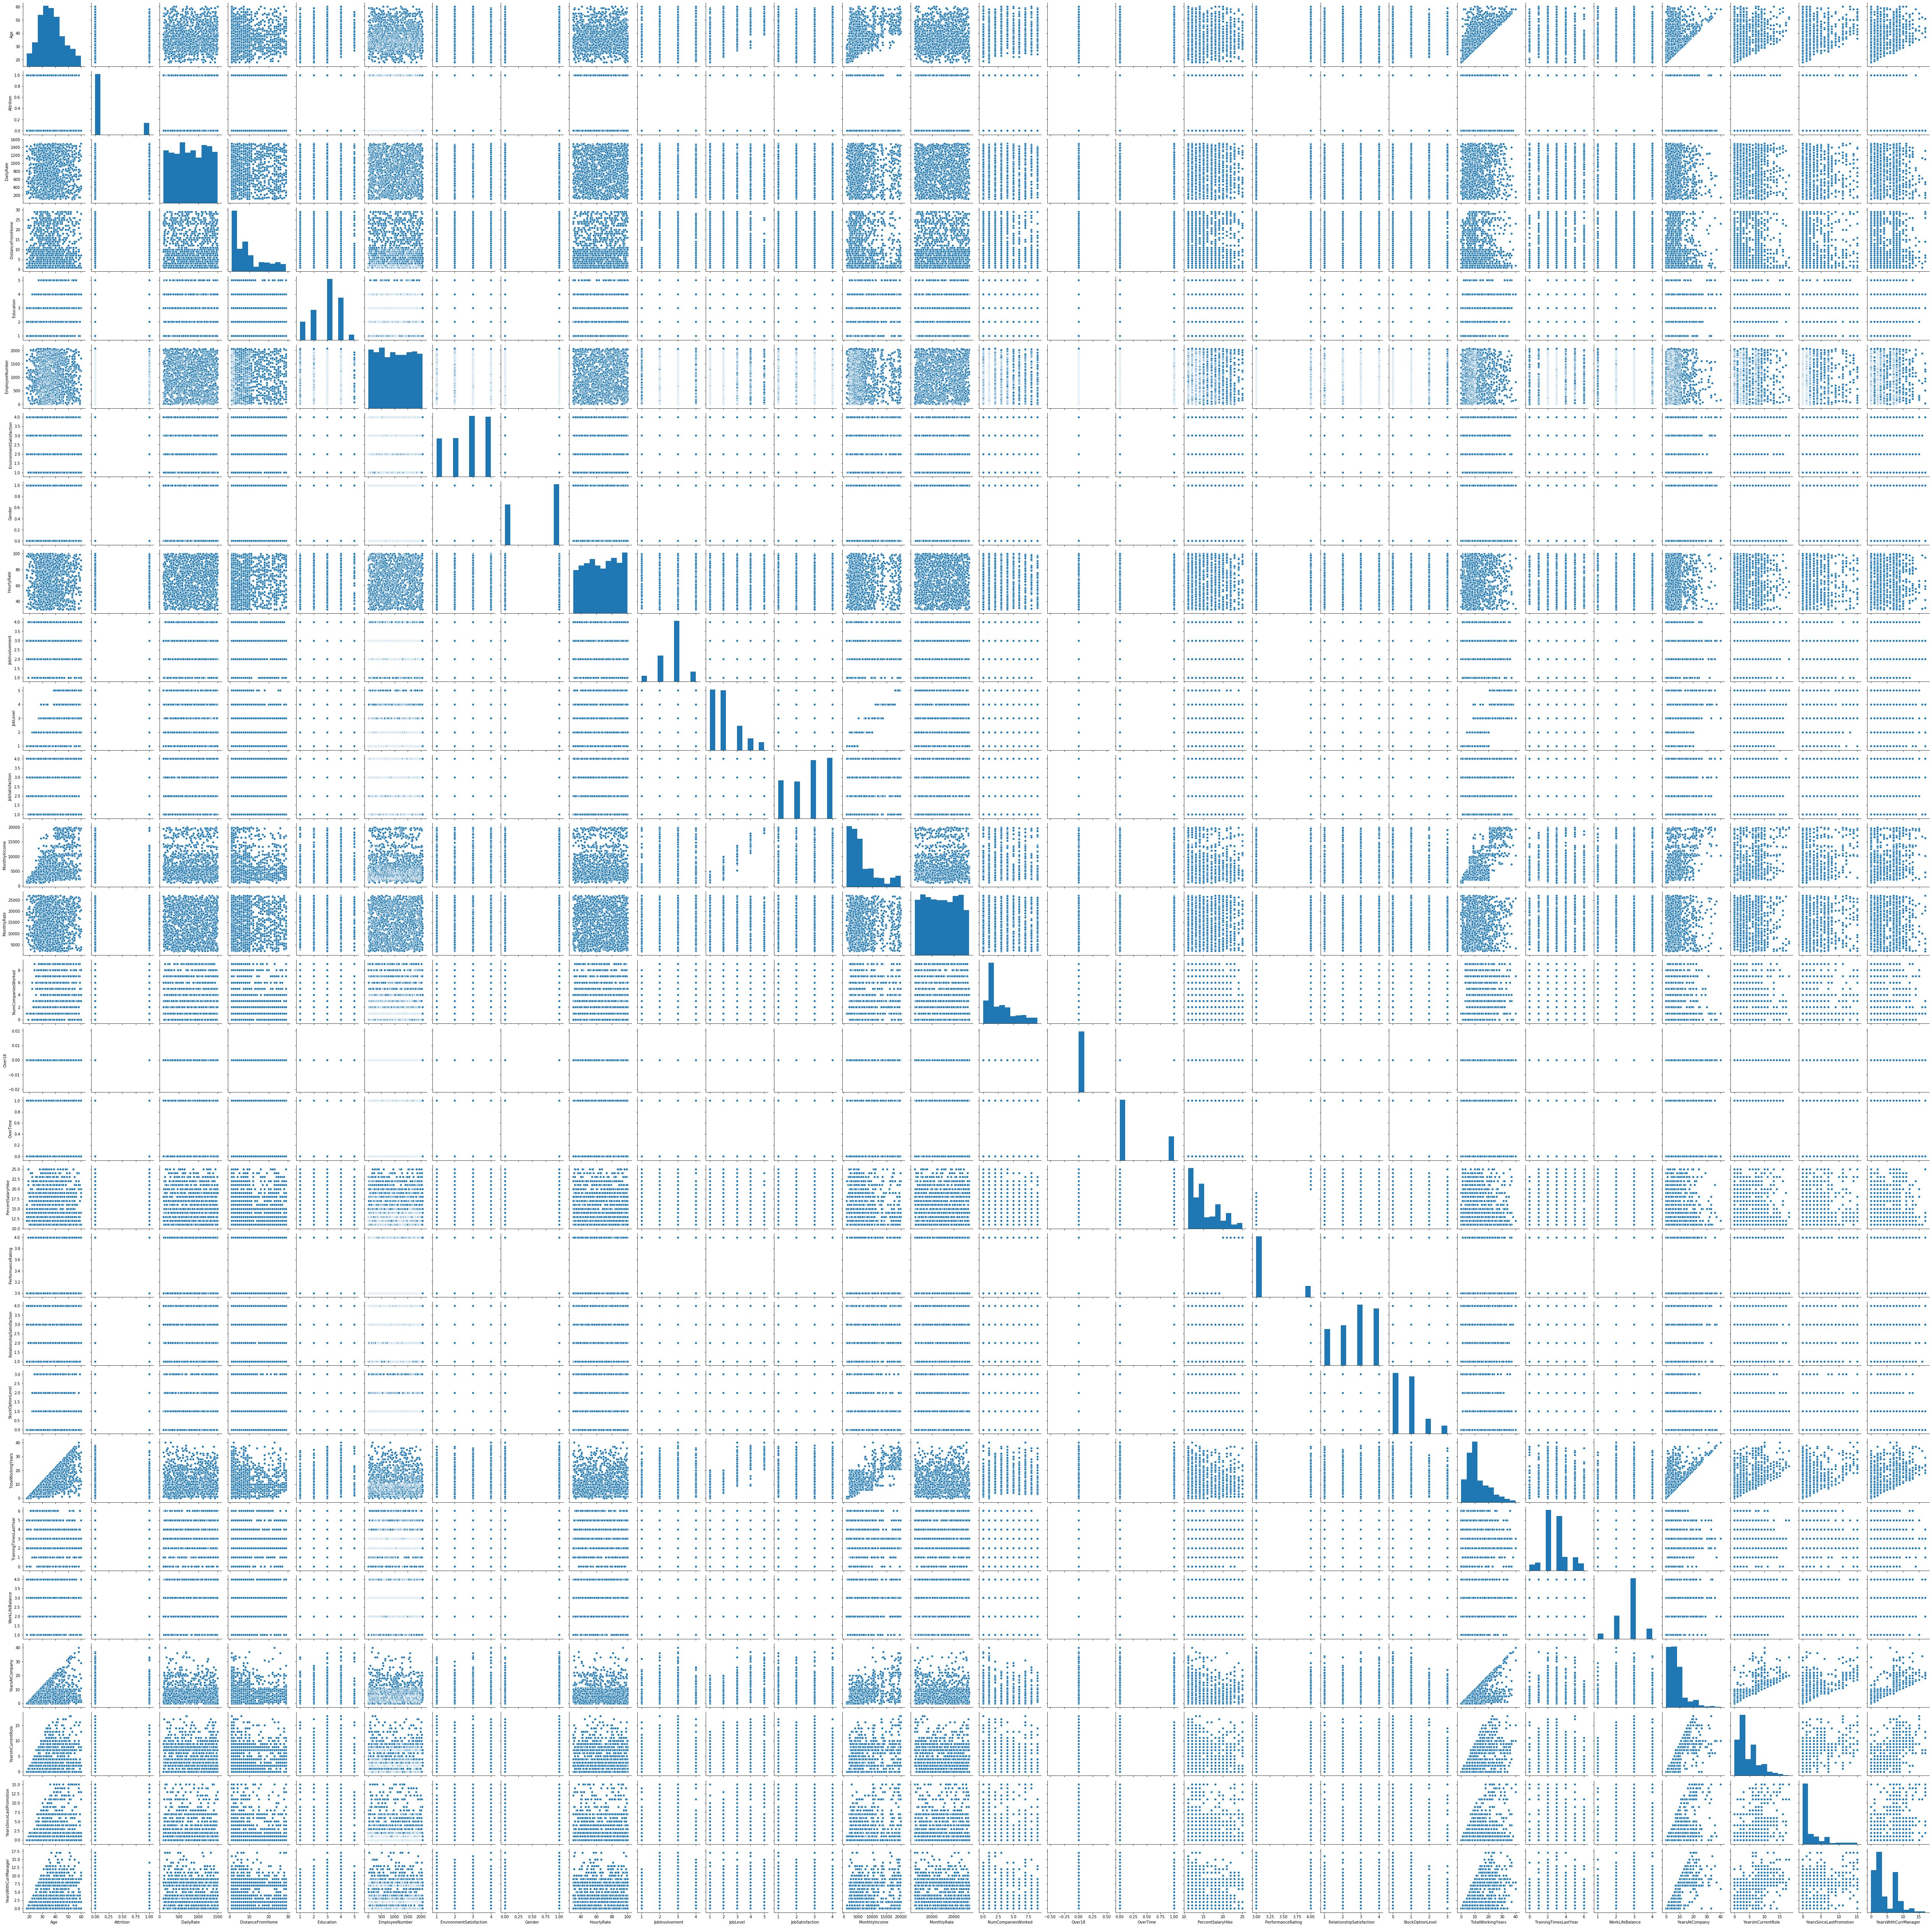

In [72]:
sns.pairplot(hv)

In [73]:
#split the data
x=hr.drop(columns=['Attrition','BusinessTravel','Department','EducationField','JobRole','MaritalStatus'])
x.head()

Age  DailyRate  DistanceFromHome  Education  EmployeeNumber  \
0   41       1102                 1          2               1   
1   49        279                 8          1               2   
2   37       1373                 2          2               4   
3   33       1392                 3          4               5   
4   27        591                 2          1               7   

   EnvironmentSatisfaction  Gender  HourlyRate  JobInvolvement  JobLevel  ...  \
0                        2       0          94               3         2  ...   
1                        3       1          61               2         2  ...   
2                        4       1          92               2         1  ...   
3                        4       0          56               3         1  ...   
4                        1       1          40               3         1  ...   

   PerformanceRating  RelationshipSatisfaction  StockOptionLevel  \
0                  3                         1                 0   
1                  4                         4                 1   
2                  3                         2                 0   
3                  3                         3                 0   
4                  3                         4                 1   

   TotalWorkingYears  TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  \
0                  8                      0                1               6   
1                 10                      3                3              10   
2                  7                      3                3               0   
3                  8                      3                3               8   
4                  6                      3                3               2   

   YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0                   4                        0                     5  
1                   7                        1                     7  
2                   0                        0                     0  
3                   7                        3                     0  
4                   2                        2                     2  

[5 rows x 27 columns]

In [74]:
y=pd.DataFrame(hr['Attrition'])
y.head()

Attrition
0          1
1          0
2          1
3          0
4          0

In [75]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=20,random_state=44)

In [76]:
print(x_train.shape,x_test.shape)
print(y_train.shape,y_test.shape)

(1450, 27) (20, 27)
(1450, 1) (20, 1)


In [77]:
lg=LogisticRegression()

In [78]:
lg.fit(x_train,y_train)
pred=lg.predict(x_test)
print('Accuracy score:',accuracy_score(y_test,pred))
print('confusion matrix:',confusion_matrix(y_test,pred))
print('classification report:',classification_report(y_test,pred))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy score: 0.95
confusion matrix: [[19  0]
 [ 1  0]]
classification report:               precision    recall  f1-score   support

           0       0.95      1.00      0.97        19
           1       0.00      0.00      0.00         1

    accuracy                           0.95        20
   macro avg       0.47      0.50      0.49        20
weighted avg       0.90      0.95      0.93        20



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [79]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn import model_selection
from sklearn.model_selection import GridSearchCV

In [80]:
model=[DecisionTreeClassifier(),SVC(),KNeighborsClassifier(),MultinomialNB()]


for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm=m.predict(x_test)
    print('Accuracy score of',m,'is:')
    print(accuracy_score(y_test,predm))
    print(confusion_matrix(y_test,predm))
    print(classification_report(y_test,predm))
    print('\n')

Accuracy score of DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best') is:
0.9
[[18  1]
 [ 1  0]]
              precision    recall  f1-score   support

           0       0.95      0.95      0.95        19
           1       0.00      0.00      0.00         1

    accuracy                           0.90        20
   macro avg       0.47      0.47      0.47        20
weighted avg       0.90      0.90      0.90        20





C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy score of SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False) is:
0.95
[[19  0]
 [ 1  0]]
              precision    recall  f1-score   support

           0       0.95      1.00      0.97        19
           1       0.00      0.00      0.00         1

    accuracy                           0.95        20
   macro avg       0.47      0.50      0.49        20
weighted avg       0.90      0.95      0.93        20





C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """


Accuracy score of KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform') is:
0.95
[[19  0]
 [ 1  0]]
              precision    recall  f1-score   support

           0       0.95      1.00      0.97        19
           1       0.00      0.00      0.00         1

    accuracy                           0.95        20
   macro avg       0.47      0.50      0.49        20
weighted avg       0.90      0.95      0.93        20





C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy score of MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True) is:
0.55
[[10  9]
 [ 0  1]]
              precision    recall  f1-score   support

           0       1.00      0.53      0.69        19
           1       0.10      1.00      0.18         1

    accuracy                           0.55        20
   macro avg       0.55      0.76      0.44        20
weighted avg       0.96      0.55      0.66        20





In [81]:
from sklearn.model_selection import cross_val_score
mnb=MultinomialNB()

score=cross_val_score(mnb,x,y,cv=10)
print(score)
print(score.mean())
print(score.std())

[0.48979592 0.53061224 0.55102041 0.53741497 0.52380952 0.5170068
 0.57823129 0.46258503 0.50340136 0.49659864]
0.5190476190476191
0.03132946650250191


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

In [82]:
sv=SVC()
score=cross_val_score(sv,x,y,cv=10)
print(score)
print(score.mean())
print(score.std())

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

[0.83673469 0.83673469 0.83673469 0.83673469 0.83673469 0.83673469
 0.83673469 0.84353741 0.84353741 0.84353741]
0.8387755102040817
0.003117398431942752


In [83]:
from sklearn.ensemble import RandomForestClassifier

rf= RandomForestClassifier(n_estimators=100,random_state=44)

rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
print(accuracy_score(y_test,predrf))
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


0.95
[[19  0]
 [ 1  0]]
              precision    recall  f1-score   support

           0       0.95      1.00      0.97        19
           1       0.00      0.00      0.00         1

    accuracy                           0.95        20
   macro avg       0.47      0.50      0.49        20
weighted avg       0.90      0.95      0.93        20



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [84]:
from sklearn.ensemble import AdaBoostClassifier
#adaboostclassifier(base_estimator=DecisionTreeClassifier(),n_estimator=50,learning_rate=1.0)
ad=AdaBoostClassifier()
ad.fit(x_train,y_train)
ad_pred=ad.predict(x_test)
print(accuracy_score(y_test,ad_pred))
print(confusion_matrix(y_test,ad_pred))
print(classification_report(y_test,ad_pred))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.95
[[19  0]
 [ 1  0]]
              precision    recall  f1-score   support

           0       0.95      1.00      0.97        19
           1       0.00      0.00      0.00         1

    accuracy                           0.95        20
   macro avg       0.47      0.50      0.49        20
weighted avg       0.90      0.95      0.93        20



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [85]:
ad=AdaBoostClassifier(n_estimators=50)
ad.fit(x_train,y_train)
ad_pred=ad.predict(x_test)
print(accuracy_score(y_test,ad_pred))
print(confusion_matrix(y_test,ad_pred))
print(classification_report(y_test,ad_pred))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.95
[[19  0]
 [ 1  0]]
              precision    recall  f1-score   support

           0       0.95      1.00      0.97        19
           1       0.00      0.00      0.00         1

    accuracy                           0.95        20
   macro avg       0.47      0.50      0.49        20
weighted avg       0.90      0.95      0.93        20



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [86]:
#import support vector classifier
from sklearn.svm import SVC
svc=SVC()

#create adaboost classifier object
ad =AdaBoostClassifier(n_estimators=50,base_estimator=svc,algorithm='SAMME')
ad.fit(x_train,y_train)
ad_pred=ad.predict(x_test)
print(accuracy_score(y_test,ad_pred))
print(confusion_matrix(y_test,ad_pred))
print(classification_report(y_test,ad_pred))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.95
[[19  0]
 [ 1  0]]
              precision    recall  f1-score   support

           0       0.95      1.00      0.97        19
           1       0.00      0.00      0.00         1

    accuracy                           0.95        20
   macro avg       0.47      0.50      0.49        20
weighted avg       0.90      0.95      0.93        20



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [87]:
from sklearn.ensemble import GradientBoostingClassifier
gb=GradientBoostingClassifier()
gb.fit(x_train,y_train)
gb_pred=gb.predict(x_test)
print(accuracy_score(y_test,gb_pred))
print(confusion_matrix(y_test,gb_pred))
print(classification_report(y_test,gb_pred))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.95
[[19  0]
 [ 1  0]]
              precision    recall  f1-score   support

           0       0.95      1.00      0.97        19
           1       0.00      0.00      0.00         1

    accuracy                           0.95        20
   macro avg       0.47      0.50      0.49        20
weighted avg       0.90      0.95      0.93        20



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [89]:
#predict the number of rape victims may occur for upcomming years
#predict the value
pred=lg.predict(x_test)
print('predicted result:',pred)
print('actual:',y_test)

predicted result: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
actual:       Attrition
284           0
1141          0
473           0
802           0
1154          0
736           0
491           0
778           0
208           0
360           0
1451          0
765           0
1185          0
151           0
728           0
416           0
386           0
314           0
7             0
259           1


In [90]:
t=np.array([42,542,4,3,3,2,1,45,2,4,3,1,4,5,2,1,1,3,2,1,2,1,3,4,2,1,2])

In [91]:
t.shape

(27,)

In [98]:
t=t.reshape(1,-1)

In [99]:
t.shape

(1, 27)

In [101]:
lg.predict(t)

array([0])

#o-means no for attrition by giving some own estiametd values

In [105]:
from joblib import dump,load
dump(hr,'HR_ATTRITION_PREDICTIONS.joblib')

['HR_ATTRITION_PREDICTIONS.joblib']